# A Notebook on Vectors in python

Assume all vectors are columnar unless indicated.

Some syntax:

Numpy 2D matrix slicing = array[row_start:row_stop:row_step, col_start:col_stop:col_step]

In [1]:
# %matplotlib ipympl
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

def pvec2(*vectors, title='', **kwargs):
    """
    Plot `n` 2-dimensional vectors.
    All vectors begin at standard origin (0,0).
    
    Parameters
    ----------
    *vectors : numpy.array
        Any number numpy arrays representing 2D vectors.

    Examples
    --------
    >>>v = np.array([0,1])
    >>>w = np.array([-1,2])
    >>>pvec2(v,w, title='two vectors')
    """
    plt.close()
    plt.figure(figsize=[6,6])
    
    # add the zero vector to the 
    # *args tuple for x/y limits
    vectors = (*vectors, np.array([0,0]))

    # find min/max x and y vals
    # and set the x and y limits
    Xs = [i[0] for i in vectors]
    Ys = [i[1] for i in vectors]
    plt.xlim(min(Xs)-1, max(Xs)+1)
    plt.ylim(min(Ys)-1, max(Ys)+1)

    for vector in vectors:
        plt.quiver(0,0,vector[0],vector[1],angles='xy',scale_units='xy',scale=1)
        plt.annotate(f"({vector[0]},{vector[1]})", xy=vector, xytext=(1, 3), textcoords="offset points")
    
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    return plt

def addvec2(vectors, title=''):
    """    
    Plot vector addition for n tuples of vectors.
    All augends begin at the standard origin (0,0).

    Parameters
    ----------
    vectors : numpy.array[tuples]
        A numpy array of numpy arrays to add. Displays as vector addition,
        where the origin of vector y is the tail of vector v, and the head
        is the head of vector w if y = v + w.

    Examples
    --------

    >>>v = np.array([0,2])
    >>>w = np.array([-1,1])
    >>>a = np.array([-4,-2])
    >>>b = np.array([3,1])
    >>>y = np.array([[v,w],[a,b]])
    >>>addvec2(y)
    """
    plt.close()
    plt.figure(figsize=[6,6])
    
    xmin, xmax = 0, 0
    ymin, ymax = 0, 0

    for vector in vectors:

        vecsum = vector[0] + vector[1]
        
        plt.quiver(0,0,vector[0][0],vector[0][1], angles='xy', scale_units='xy', scale=1)
        plt.annotate(f"({vector[0][0]},{vector[0][1]})", xy=vector[0], xytext=(1, 3), textcoords="offset points")

        plt.quiver(vector[0][0],vector[0][1],vector[1][0],vector[1][1], angles='xy', scale_units='xy', scale=1)
        plt.annotate(f"({vector[1][0]},{vector[1][1]})", xy=vector[0]+vector[1], xytext=(1, 3), textcoords="offset points")

        plt.quiver(0,0,vecsum[0], vecsum[1], angles='xy', scale_units='xy', scale=1)
        plt.annotate(f"({vecsum[0]},{vecsum[1]})", xy=vecsum/2, xytext=(1, 3), textcoords="offset points")

        m = (vector[0][0], vector[1][0], 0, vecsum[0])
        if min(m) < xmin:
            xmin = min(m)

        if max(m) > xmax:
            xmax = max(m)

        m = (vector[0][1], vector[1][1], 0, vecsum[1])
        if min(m) < ymin:
            ymin = min(m)

        if max(m) > ymax:
            ymax = max(m)

    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)

    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

def pvec3(*vectors, title=''):

    plt.close()
    ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')

    vectors = (*vectors, np.array([0,0,0]))

    Xs = [i[0] for i in vectors]
    Ys = [i[1] for i in vectors]
    Zs = [i[2] for i in vectors]
    ax.set_xlim(min(Xs)-1, max(Xs)+1)
    ax.set_ylim(min(Ys)-1, max(Ys)+1)
    ax.set_zlim(min(Zs)-1, max(Zs)+1)

    for vector in vectors:
        ax.quiver(0,0,0,vector[0],vector[1],vector[2])
        ax.text(vector[0],vector[1],vector[2], f'({vector[0]},{vector[1]},{vector[2]})')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.title(title)
    plt.tight_layout()
    plt.grid()
    return plt

# Vectors

## Row and Column Vectors

In [2]:
# row vector
a = np.array([[1,2,3]])
print(a)
print(a.shape) # one element of length 3

[[1 2 3]]
(1, 3)


In [3]:
# column vector
b = np.array([[4,5,6]])
print(b.T)
print(b.T.shape) # three elements of length 1

[[4]
 [5]
 [6]]
(3, 1)


## Adding Vectors

In [4]:
# add two row vectors
print(a, "+", b)
a+b

[[1 2 3]] + [[4 5 6]]


array([[5, 7, 9]])

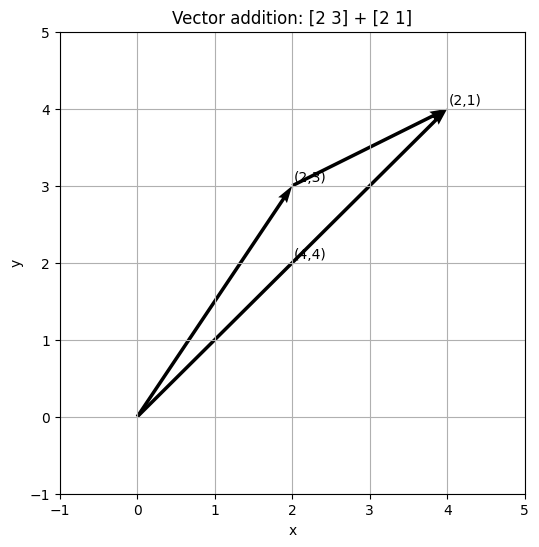

In [5]:
# Define the vector 'a'
a = np.array([2, 3])
b = np.array([2, 1])
addvec2(np.array([[a,b]]), title="Vector addition: [2 3] + [2 1]")

## Subtracting Vectors

Mathematically, subtracting vectors is just negative addition. But, geometrically, the procedure is different.

In vector addition, the added vector starts at the head of the base vector. The answer is the line between the first tail and last head.

In vector subtraction, the subtracted, or 'negative' vector, starts at the tail of the other vector. The resultant is the vector from the head of the subtracted, or negative, or subtrahend, vector to the head of the minuend vector.

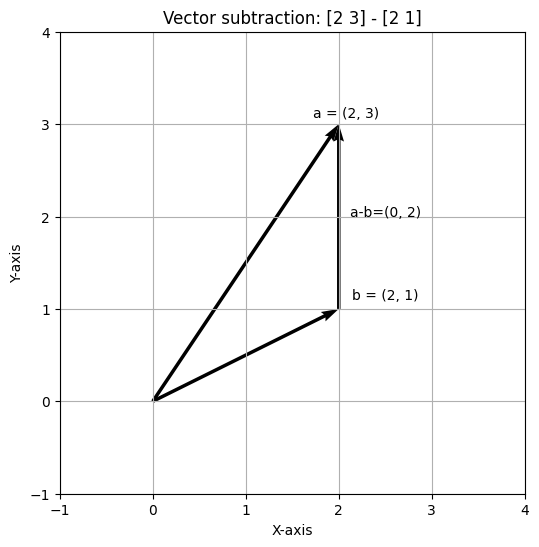

In [6]:
# Define the vector 'a'
a = np.array([2, 3])
b = np.array([2, 1])

# Create a plot of the vector 'a'
plt.close()
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(b[0], b[1], a[0]-b[0], a[1]-b[1], angles='xy', scale_units='xy', scale=1)

# Annotate the vector
plt.annotate(f"a = ({a[0]}, {a[1]})", xy=(a[0], a[1]), xytext=(5, 5), textcoords="offset points", ha="center")
plt.annotate(f"b = ({b[0]}, {b[1]})", xy=(b[0]+.5, b[1]+.1), ha="center")
plt.annotate("a-b=(0, 2)", xy=(2.5,2), ha="center")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Vector subtraction: [2 3] - [2 1]")
plt.xlim(-1, max(abs(a))+1)
plt.ylim(-1, max(abs(a))+1)
plt.grid()
plt.show()

## Averaging Vectors

Averaging is sum then divide by N.
Averaging vectors is to add them, then scalar multiply by 1/N vectors.

In [7]:
print("(", a, "+", b, ") * 1/N vectors")
(a+b)*(1/2)

( [2 3] + [2 1] ) * 1/N vectors


array([2., 2.])

## Multiplying Vectors

In [8]:
print(a, "*", b)
a*b

[2 3] * [2 1]


array([4, 3])

## Vector Transposition
Matrices have **(row,column)** indices. Transposition swaps those indices.

$\mathbf{m}^T_{i,j}=\mathbf{m}_{j,i}$

## Vector Dimensionality

Vectors have either one row, or one column, depending on orientation.

So, a 6D row vector $\mathbf{v}$ has indices $i=1$, $j=6$, or $\mathbf{m}_{1,6}$.

## Vector Broadcasting

In [9]:
# add a row to column vector
a = np.array([[1,2,3]])
b = np.array([[4,5,6]])
print(b.T, "+", a)
a+b.T

[[4]
 [5]
 [6]] + [[1 2 3]]


array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

## Vector Magnitude

The geometric length (magnitude) of a vector.

Denoted like $\lVert\mathbf{v}\rVert$

The magnitude is the distance from the tail to the head of a vector, computed using the standard Euclidean distance formula: the square root of the sum of squared vector elements: $$\displaystyle\lVert\mathbf{v}\rVert=\sqrt{\sum{^n_i}=1v^2_i}$$

or

$$\lVert\mathbf{v}\rVert^2=\sum{^n_i}=1v^2_i$$

or

$$\lVert\mathbf{v}\rVert=\sqrt{\mathbf{v}^\top\mathbf{v}}$$

In [10]:
import math
v = np.array([1,2,3,4,5,6])
print("Dimensions:", len(v))
print("Magnitude:", np.linalg.norm(v))
print("Magnitude:", math.sqrt(np.dot(v.T, v)))

# math.sqrt(np.dot(x.T, x))

Dimensions: 6
Magnitude: 9.539392014169456
Magnitude: 9.539392014169456


## Unit Vectors

$$\lVert\mathbf{v}\rVert=1$$

Creating a unit vector:

$$\mathbf{\widehat{v}}=\frac{1}{\lVert\mathbf{v}\rVert}\mathbf{v}$$

The set of infinite unit vectors is smaller than the set of infinite non-unit vectors. Here's why:

In [11]:
# Define the sets:
unit_vectors = []
non_unit_vectors = []

# Generate a small number of random points for each set
for i in range(5):
    angle = 2 * np.pi * i / 10
    unit_vector = np.array([np.cos(angle), np.sin(angle)])
    unit_vectors.append(unit_vector)

    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)
    non_unit_vector = np.array([x, y])
    non_unit_vectors.append(non_unit_vector)

# Print the sets:
print("Unit vectors:")
for vec in unit_vectors:
    print(vec)

print("\nNon-unit vectors:")
for vec in non_unit_vectors:
    print(vec)

Unit vectors:
[1. 0.]
[0.80901699 0.58778525]
[0.30901699 0.95105652]
[-0.30901699  0.95105652]
[-0.80901699  0.58778525]

Non-unit vectors:
[0.5661427  4.21183172]
[-3.80912417 -0.94793411]
[0.95531666 1.07494557]
[-3.86055532 -2.02578306]
[-0.29582501 -0.91361232]


In [12]:
# a random non-unit vector
np.linalg.norm(non_unit_vectors[np.random.choice(len(non_unit_vectors)-1)])

np.float64(4.3597803130939825)

In [13]:
# a random unit vector
np.linalg.norm(unit_vectors[np.random.choice(len(unit_vectors)-1)])

np.float64(0.9999999999999999)

All unit vectors norm to 1, meaning they have a magnitude of 1. The set is bounded and closed.

All non-unit vectors can have any magnitude. The set is unbounded and open.

## Crafting a unit vector from a nonunit vector

$$\widehat{\mathbf{v}}=\frac{1}{\lVert\mathbf{v}\rVert}\mathbf{v}$$

Simply scalar multiply by the reciprocal of the vector norm.

In [14]:
a_unit_vector = 1/(np.linalg.norm(a))*a
print(a)
print(np.linalg.norm(a_unit_vector))

[[1 2 3]]
1.0


## Vector Dot Product

Notations:

$\mathbf{a}^\top\mathbf{b}$,

$\mathbf{a \cdot b}$,

$\langle \mathbf{a, b} \rangle$

$\mathbf{a}$ and $\mathbf{b}$ are vectors, and $a_i$ indicates the *i*th element of $\mathbf{a}$. 

The equation: $$\delta=\sum^n_{i=1}a_i b_i$$

So: $$\begin{bmatrix} 1 2 3 4\end{bmatrix}\cdot\begin{bmatrix}5 6 7 8\end{bmatrix}$$
$$=1\times5+2\times6+3\times7+4\times8$$
$$=5+12+21+32$$
$$=70$$

In [15]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
print(np.dot(a,b))
print(a@b) # the same thing

70
70


You can scalar multiply one vector, which scales the dot product by the same amount.

In [16]:
scalar1 = 10
print(a*scalar1@b) # can be applied to one vector
print((a@b)*scalar1) # or the dot product itself

scalar1 = -10 # a negative scalar preserves the magnitude but switches the sign
print(a*scalar1@b)
print((a@b)*scalar1)

700
700
-700
-700


## The Dot Product is Distributive

$$\mathbf{a}^\top(\mathbf{b}+\mathbf{c})=\mathbf{a}^\top\mathbf{b}+\mathbf{a}^\top\mathbf{c}$$

In [17]:
a = np.array([0,1,2])
b = np.array([3,4,5])
c = np.array([6,7,8])

print(np.dot(a, b+c))
print(np.dot(a,b) + np.dot(a,c))

37
37


## Geometric Definition of the Vector Dot Product

$$\alpha = \cos(\theta_{\mathbf{v},\mathbf{w}}) \lVert\mathbf{v}\rVert\,\lVert\mathbf{w}\rVert$$

or

$$\cos(\theta_v,_w)=\frac{\mathbf{v}^\top\mathbf{w}}{\lVert\mathbf{v}\rVert\,\lVert\mathbf{w}\rVert}$$

The product of the magnitude of the two vectors, scaled by the cosine of the angle between them.

In [18]:
# the spatial cosine similarity
a_mag = np.linalg.norm(a)
b_mag = np.linalg.norm(b)
cosine = np.dot(a,b) / (a_mag * b_mag)
print(a, b)
print("Cosine similarity", cosine)

# the spatial cosine distance 
distance = scipy.spatial.distance.cosine(a,b)
print("Cosine distance", distance)

[0 1 2] [3 4 5]
Cosine similarity 0.8854377448471461
Cosine distance 0.11456225515285379


In [19]:
# the spatial cosine similarity
a_mag = np.linalg.norm(a)
c_mag = np.linalg.norm(c)
cosine = np.dot(a,c) / (a_mag * c_mag)
print(a,c)
print("Cosine similarity", cosine)

# the spatial cosine distance 
distance = scipy.spatial.distance.cosine(a,c)
print("Cosine distance", distance)

[0 1 2] [6 7 8]
Cosine similarity 0.8426548012644084
Cosine distance 0.1573451987355916


## Orthogonal Vectors Have a Zero Dot Product

*two vectors are orthogonal if:*
- two vectors have a dot product of zero
- two vectors meet at 90 degree angles

np.int64(0)

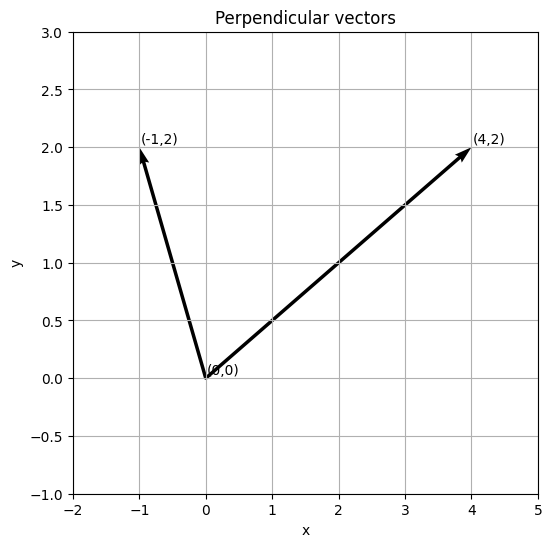

In [20]:
# TODO: move to 'Orthogonal Vectors Have a Zero Dot Product'
# if the dot product is 0
# the vectors are perpendicular
pvec2([4,2],[-1,2],title='Perpendicular vectors')
np.dot([4,2],[-1,2])

np.int64(5)

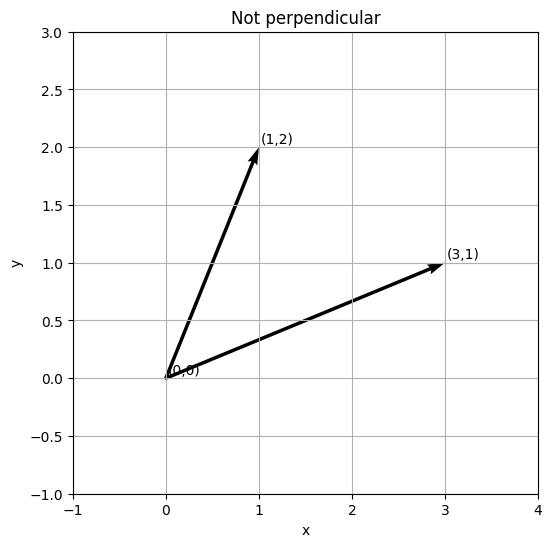

In [21]:
# TODO: move to 'Orthogonal Vectors Have a Zero Dot Product'
pvec2([1,2],[3,1], title='Not perpendicular')
np.dot([1,2],[3,1])

## Hadamard Multiplication

Element-wise mutliplication

$$\begin{bmatrix} 5\\ 4\\ 8\\ 2\end{bmatrix} \odot \begin{bmatrix} 1\\ 0\\ .5\\ -1\end{bmatrix} = \begin{bmatrix} 5\\ 0\\ 4\\ -2\end{bmatrix}$$

In [22]:
a = np.array([5,4,8,2])
b = np.array([1,0,0.5, -1])
a*b

array([ 5.,  0.,  4., -2.])

## Outer Product

$$\begin{bmatrix} a\\ b\\ c\end{bmatrix} \begin{bmatrix}d\, e\end{bmatrix}=\begin{bmatrix}ad\, ae\\ bd\, be\\cd\, ce\end{bmatrix}$$

Denoted $\mathbf{v}\mathbf{w}^\top$ because we assume all vectors are columnar until indicated, so the outer product is column vector $\mathbf{v}$ times the row vector $\mathbf{w}$.

In [23]:
a = np.array([1,2,3])
b = np.array([4,5])
print(np.outer(a,b))

[[ 4  5]
 [ 8 10]
 [12 15]]


In [24]:
for _a in a:
    for _b in b:
        print(_a * _b)

4
5
8
10
12
15


## Orthogonal Vector Projection

We want to project a point at the head of vector $\mathbf b$ onto vector $\mathbf a$ with minimum distance. This will result in a vector that intersects vector $\mathbf a$ at a right angle. The point at which the projection intersects $\mathbf{a}$ will be called $\beta$. And the vector from the head of $\mathbf{b}$ to $\beta$ will be called $\mathbf{b}-\beta\mathbf{a}$.

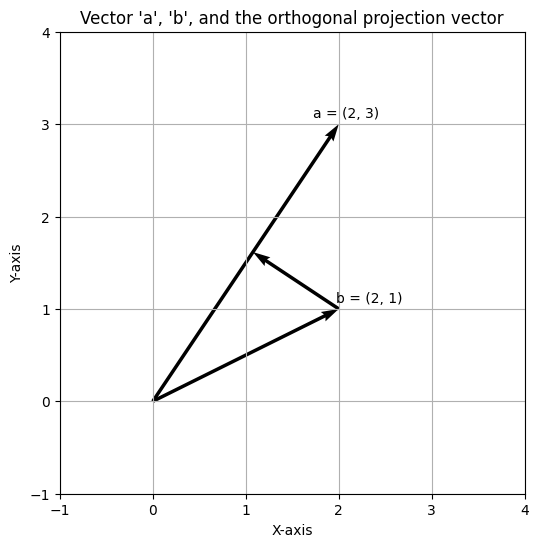

In [25]:
# Define the vector 'a'
a = np.array([2, 3])
b = np.array([2, 1])
beta = np.dot(a,b)/np.dot(a,a) # the orthogonal projection from the head of b, to a
projected_beta = a*beta

# Create a plot of the vector 'a'
plt.close()
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(b[0], b[1], projected_beta[0]-b[0], projected_beta[1]-b[1], angles='xy', scale_units='xy', scale=1)

# Annotate the vector
plt.annotate(f"a = ({a[0]}, {a[1]})", xy=(a[0], a[1]), xytext=(5, 5), textcoords="offset points", ha="center")
plt.annotate(f"b = ({b[0]}, {b[1]})", xy=(b[0]+.25, b[1]), xytext=(5, 5), textcoords="offset points", ha="center")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Vector 'a', 'b', and the orthogonal projection vector")
plt.xlim(-1, max(abs(a))+1)
plt.ylim(-1, max(abs(a))+1)
plt.grid()
plt.show()

The dot product between orthogonal vectors is 0. And we know the projection from the head of $\mathbf b$ will create an orthogonal vector. 

So, the projection vector is orthogonal to $\beta$ on vector $\mathbf{a}$, and the dot product is zero.

Thus, $$\mathbf{a}^\top(\mathbf{b}-\beta\mathbf{a})=0$$

We use the distributive property of dot products and apply algebra to solve for zero.

$$\mathbf{a}^\top\mathbf{b}-\beta\mathbf{a}^\top\mathbf{a}=0$$
$$\beta\mathbf{a}^\top\mathbf{a}=\mathbf{a}^\top\mathbf{b}$$
$$\beta=\frac{\mathbf{a}^\top\mathbf{b}}{\mathbf{a}^\top\mathbf{a}}$$

Which is to say, $\beta$ is the quotient of the dot product of column vector $\mathbf{a}$ and row vector $\mathbf{b}$ over the dot product of column vector $\mathbf{a}$ and row vector $\mathbf{a}$. It scales vector $\mathbf{a}$.

In [26]:
print(a)
print(b)
print(np.dot(a,b)/np.dot(a,a))
print(a*beta) # the resulting vector is colinear with vector a, and the head is at the point which is closest to the head of vector b.

[2 3]
[2 1]
0.5384615384615384
[1.07692308 1.61538462]


## Orthogonal Vector Decomposition

Given a vector $\mathbf{t}$, we want to decompose it into the sum of two vectors that are orthogonal and parallel to a reference vector $\mathbf{r}$.

This will produce two vectors: a parallel vector $\mathbf{t\parallel r}$, and a perpendicular vector $\mathbf{t\bot r}$.

So we must find a vector that is parellel to $\mathbf{r}$. Any scaled version of $\mathbf{r}$ is parallel, so we find $\mathbf{t\parallel r}$ by applying orthogonal projection.

$$\mathbf{t\parallel r} = \mathbf{r}\frac{\mathbf{t}^\top\mathbf{r}}{\mathbf{r}^\top\mathbf{r}}$$

Because vector $\mathbf{t\parallel r}$ is a scaled version of $\mathbf{r}$, it could be thought of as $\beta\mathbf{r}$. Rather than compute just the scalar, like in projection, we compute the scaled vector.

The perpendicular and parallel vectors $\mathbf{t\parallel r}$ and $\mathbf{t\bot r}$ will sum to the target vector $\mathbf{t}$, so using algebra:

$$\mathbf{t}=\mathbf{t\bot r}+\mathbf{t\parallel r}$$
$$\mathbf{t\bot r}=\mathbf{t-t\parallel r}$$

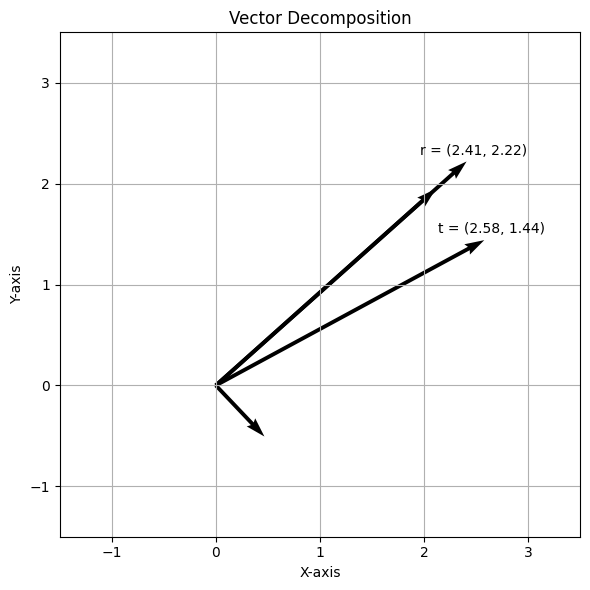

In [27]:
t = np.array([2.58,1.44])
r = np.array([2.41,2.22])
parallel_r = r*(np.dot(t.T, r))/(np.dot(r.T,r))
perpendicular_r = t-parallel_r

plt.close()
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, r[0], r[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, parallel_r[0], parallel_r[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, perpendicular_r[0], perpendicular_r[1], angles='xy', scale_units='xy', scale=1)

plt.annotate(f"t = ({round(t[0],2)}, {round(t[1],2)})", xy=(t[0], t[1]), xytext=(5, 5), textcoords="offset points", ha="center")
plt.annotate(f"r = ({round(r[0],2)}, {round(r[1],2)})", xy=(r[0], r[1]), xytext=(5, 5), textcoords="offset points", ha="center")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Vector Decomposition")

plt.xlim(-1.5, 3.5)
plt.ylim(-1.5, 3.5)

plt.tight_layout()
plt.grid()
plt.show()

## Vector Sets

Denoted like $V = \{\mathbf{v_1,...,v_n}\}$

## Linear Weighted Combination

Scalar-vector multiplication and addition: take a set of vectors, multiply each vector by a scalar, then add them to product a single vector.

$\mathbf{w}=\lambda_1\mathbf{v}_1+\lambda_2\mathbf{v}_2+...+\lambda_n\mathbf{v}_n$

All the vectors have to have the same dimensionality.

$$\lambda_1=1,\,\,\lambda_2=2,\,\,\lambda_3=-3\qquad \mathbf{v}_1=\begin{bmatrix}4\\ 5\\ 1\end{bmatrix}, \mathbf{v}_2=\begin{bmatrix}-4\\ 0\\ -4\end{bmatrix}, \mathbf{v}_3=\begin{bmatrix}1\\ 3\\ 2\end{bmatrix}$$
$$\mathbf{w}=\lambda_1\mathbf{v}_1+\lambda_2\mathbf{v}_2+\lambda_3\mathbf{v}_3=\begin{bmatrix}-7\\ -4\\ -13\end{bmatrix}$$

In [28]:
l1 = 1
l2 = 2
l3 = -3
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])
l1*v1 + l2*v2 + l3*v3

array([ -7,  -4, -13])

In [29]:
# the tinygrad way
sum([i[0]*i[1] for i in zip([1,2,-3], [np.array([4,5,1]),np.array([-4,0,-4]),np.array([1,3,2])])])

array([ -7,  -4, -13])

## Linear Independence

A vector set is *linearly dependent* if at least one vector in the set can be expressed as a linear weighted combination of other vectors in that set. If no vectors in the set can be expressed as a linear weighted combination, the set is *linearly independent*.

$$V = \begin{Bmatrix}\begin{bmatrix}1\\ 3\end{bmatrix},\begin{bmatrix}2\\ 7\end{bmatrix}\end{Bmatrix}\qquad S = \begin{Bmatrix}\begin{bmatrix}1\\ 3\end{bmatrix},\begin{bmatrix}2\\ 6\end{bmatrix}\end{Bmatrix}$$

Vector set $V$ is *linearly independent* because neither vector can be expressed as the linear weighted combination of the other. Vector set $S$ is *linearly dependent* because one vector **can** be expressed as the linear weighted combination of the other. There is an infinite number of potential linear combinations for set $S$, two of which are $\mathbf{s}_1=0.5s_2$ and $\mathbf{s}_2=2s_1$.

In [30]:
print(np.array([2,6])*0.5)
print(np.array([1,3])*2)

[1. 3.]
[2 6]


So linear dependence can be expressed as $\mathbf{0}=\lambda_1\mathbf{v}_1+\lambda_2\mathbf{v}_2+...+\lambda_n\mathbf{v}_n,\quad\lambda\in\mathbb{R}$. If you can find some $\lambda$s that make the equation true, the set is linearly dependent. But, usually the equation is constrained to non-trivial solutions. That is, at least one $\lambda\ne0$. This constraint can be incorporated into the equation:
$$\mathbf{0}=\mathbf{v}_1+...+\frac{\lambda_n}{\lambda_1}\mathbf{v}_n,\quad\lambda\in\mathbb{R},\,\lambda_1\ne0$$

Linear independence means the vectors contain information.

## Subspace and Span

For any finite set of vectors, there are an infinite number of ways to linearly combine them using different weights, creating a *vector subspace*.

The mechanism for combining all possible linear weighted combinations is the *span* of the vector set.

Take, for instance:

$$V = \begin{Bmatrix}\begin{bmatrix}1\\ 3\end{bmatrix}\end{Bmatrix}$$

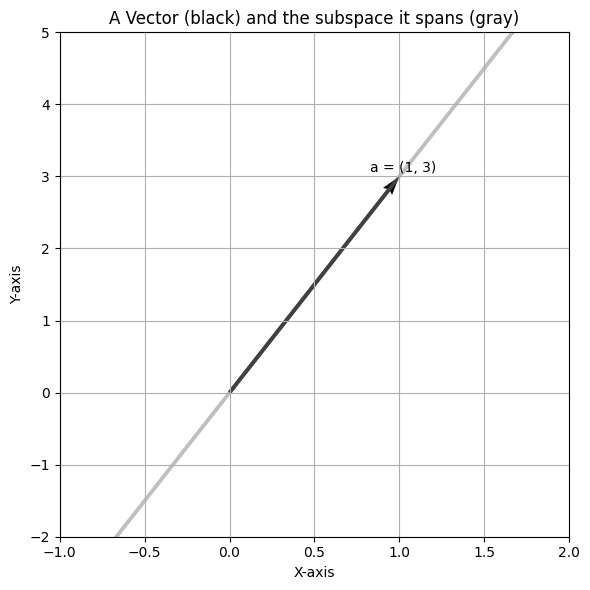

In [31]:
a = np.array([1,3])
scaled_a = a*5
negative_scaled_a = scaled_a * -1

plt.close()
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, scaled_a[0], scaled_a[1], angles='xy', scale_units='xy', scale=1, color="grey", alpha=0.5)
plt.quiver(0, 0, negative_scaled_a[0], negative_scaled_a[1], angles='xy', scale_units='xy', scale=1, color="grey", alpha=0.5)

plt.annotate(f"a = ({round(a[0],2)}, {round(a[1],2)})", xy=a, xytext=(3, 3), textcoords="offset points", ha="center")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("A Vector (black) and the subspace it spans (gray)")

plt.xlim(-1, 2)
plt.ylim(-2, 5)

plt.tight_layout()
plt.grid()
plt.show()

Now, a set of two vectors in $\mathbb{R}^3:$

$$V = \begin{Bmatrix}\begin{bmatrix}1\\0\\2\end{bmatrix},\begin{bmatrix}-1\\1\\2\end{bmatrix}\end{Bmatrix}$$

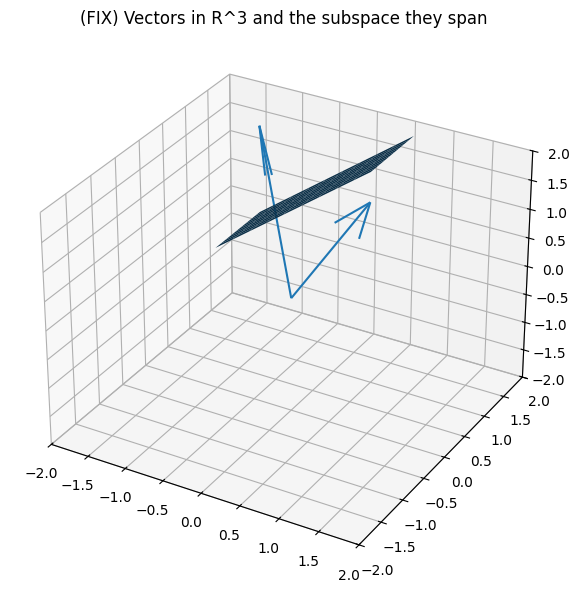

In [32]:
# TODO: fix the graph the subspace plane
a = np.array([1,0,2])
b = np.array([-1,1,2])

# no idea how to graph the 3d subspace, and this isn't correct
X = np.linspace(a[0], b[0], 10)
Y = np.linspace(a[1], b[1], 10)
X,Y = np.meshgrid(X,Y)
Z = X * a[0] + Y * a[1] + (a[2] - a[0]*b[0] - a[1]*b[1]) / b[2]

plt.close()
ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
ax.quiver(0,0,0,a[0],a[1],a[2])
ax.quiver(0,0,0,b[0],b[1],b[2])
ax.plot_surface(X, Y, Z)

plt.title("(FIX) Vectors in R^3 and the subspace they span")
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
plt.tight_layout()
plt.grid()
plt.show()

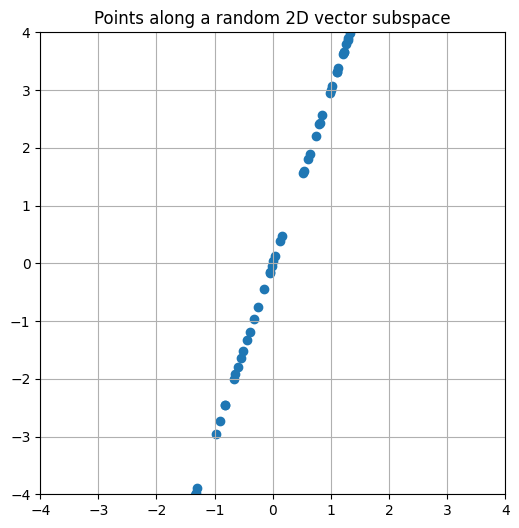

In [33]:
# randomized points along a 2D vector subspace
# these points lie along a half-open interval [-4,4) of the vector subspace, based on the vector = [1 3]
# there are an infinite number of potential points
vector_set = np.array([1,3])
random_scalars = np.random.uniform(-4,4,100)
subspace_points_x = [scalar*vector_set[0] for scalar in random_scalars]
subspace_points_y = [scalar*vector_set[1] for scalar in random_scalars]
plt.close()
plt.figure(figsize=[6,6])
plt.scatter(subspace_points_x, subspace_points_y)
plt.title('Points along a random 2D vector subspace')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid()

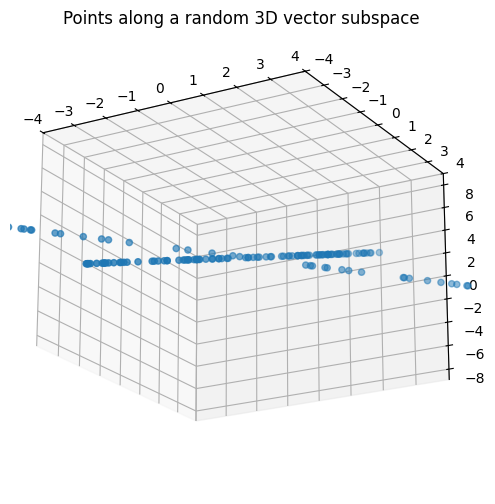

In [34]:
# randomized points along a 3D vector subspace
# all the points lie along the same 3D plane when graphed
# TODO: graph the plane
vector_set_v1 = np.array([3,5,1])
vector_set_v2 = np.array([0,2,2])

random_scalars_1 = np.random.uniform(-4,4,100)
random_scalars_2 = np.random.uniform(-4,4,100)

plt.close()

p1x, p1y, p1z = [],[],[]
for scalar in random_scalars_1:
    p1x.append(scalar*vector_set_v1[0])
    p1y.append(scalar*vector_set_v1[1])
    p1z.append(scalar*vector_set_v1[2])

p2x, p2y, p2z = [],[],[]
for scalar in random_scalars_2:
    p1x.append(scalar*vector_set_v2[0])
    p1y.append(scalar*vector_set_v2[1])
    p1z.append(scalar*vector_set_v2[2])

ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')

ax.scatter(p1x, p1y, p1z)
ax.scatter(p2x, p2y, p2z)
plt.title('Points along a random 3D vector subspace')
plt.xlim(-4,4)
plt.ylim(-4,4)
ax.view_init(-20)
plt.grid()

<module 'matplotlib.pyplot' from '/Users/adam/Documents/physics/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

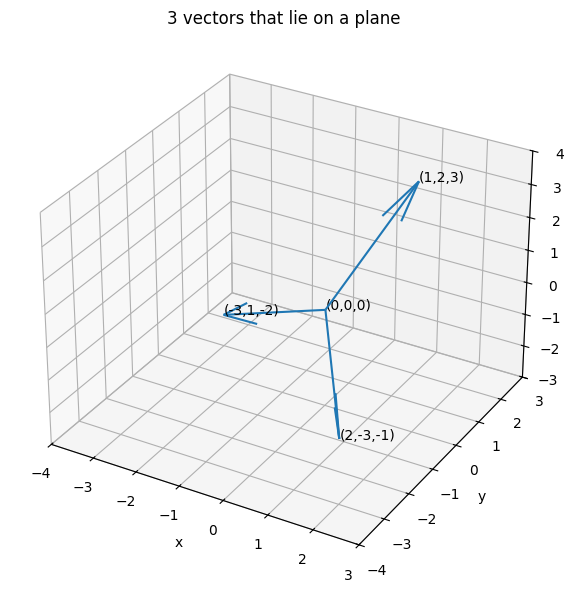

In [35]:
# TODO: Create pvec function for R^3 space

# compute u+v+w and 2u+2v+w.
# How do you know u,v,w lie in a plane?

u = np.array([1,2,3])
v = np.array([-3,1,-2])
w = np.array([2,-3,-1])

pvec3(u,v,w, title='3 vectors that lie on a plane')

<module 'matplotlib.pyplot' from '/Users/adam/Documents/physics/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

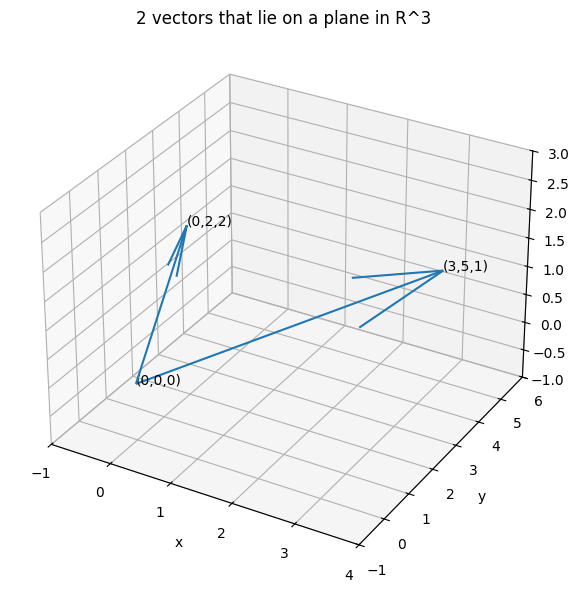

In [36]:
u = np.array([3,5,1])
v = np.array([0,2,2])

pvec3(u,v, title='2 vectors that lie on a plane in R^3')

## Basis

A *basis* is a set of rulers used to describe the information in a matrix.

A familiar basis set is the Cartesian axis: the standard XY (2D) or XYZ (3D) plane commonly used in graphing.

The basis for 2D and 3D Cartesian graphs are:

$$S_2=\begin{Bmatrix}\begin{bmatrix}1\\0\end{bmatrix},\begin{bmatrix}0\\1\end{bmatrix}\end{Bmatrix}\qquad S_3=\begin{Bmatrix}\begin{bmatrix}1\\0\\0\end{bmatrix},\begin{bmatrix}0\\1\\0\end{bmatrix},\begin{bmatrix}0\\0\\1\end{bmatrix}\end{Bmatrix}$$

Cartesian basis sets comprise vectors that are mutually orthogonal and unit length. It's often called the *standard basis set*.

Here, we define a different basis set for illustration.

$$T=\begin{Bmatrix}\begin{bmatrix}3\\1\end{bmatrix},\begin{bmatrix}-3\\1\end{bmatrix}\end{Bmatrix}$$

Now consider the following graph:

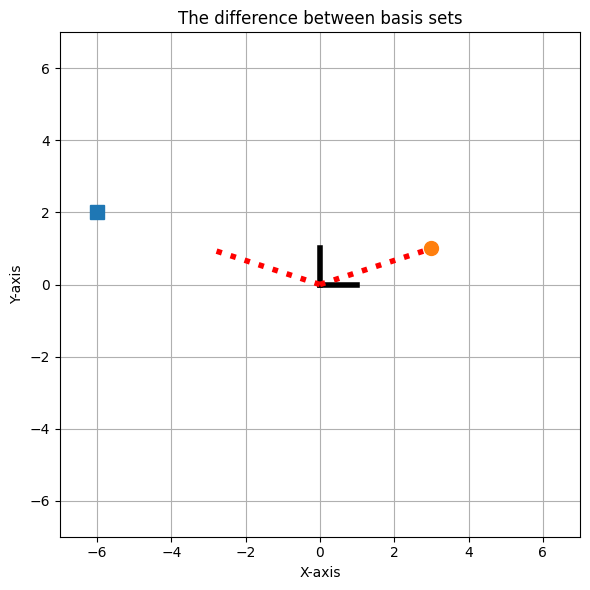

In [37]:
basis = np.array([[3,1],[-3,1]])

plt.close()
plt.figure(figsize=(6, 6))
plt.plot(-6, 2, marker='s', markersize=10)
plt.plot(3, 1, marker='o', markersize=10)
plt.plot([0,1],[0,0], linewidth=4, color='black')
plt.plot([0,0],[1,0], linewidth=4, color='black')
plt.plot([0,3],[0,1], linewidth=4, color='red', linestyle='dotted')
plt.plot([0,-3],[0,1], linewidth=4, color='red', linestyle='dotted')

# plt.annotate(f"a = ({round(a[0],2)}, {round(a[1],2)})", xy=a, xytext=(3, 3), textcoords="offset points"\

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("The difference between basis sets")

plt.xlim(-7,7)
plt.ylim(-7,7)

plt.tight_layout()
plt.grid()
plt.show()

In the basis set $S_2$, the points above are $p=(3,1),\,q=(-6,2)$. We can express these points as the linear combination of the basis vector $S$:
$$S=\begin{Bmatrix}\begin{bmatrix}1\\0\end{bmatrix},\begin{bmatrix}0\\1\end{bmatrix}\end{Bmatrix} \in\mathbb{R}^2$$
$$p=3\mathbf{s}_1+1\mathbf{s}_2,\,q=-6\mathbf{s}_1+2\mathbf{s}_2$$

If the basis set were:

$$T=\begin{Bmatrix}\begin{bmatrix}3\\1\end{bmatrix},\begin{bmatrix}-3\\1\end{bmatrix}\end{Bmatrix}$$

the same points above could be expressed as:

$$p=1\mathbf{t}_1+0\mathbf{t}_2,\,q=0\mathbf{t}_1+2\mathbf{t}_2$$
or
$$p=\mathbf{t}_1,\,q=2\mathbf{t}_2$$

## Pearson correlation coefficient

Before the correlation coefficient can be calculated the data needs to be normalized to the expected range -1 to +1.

First, *mean center each variable*. It means subtracting the average value from each data value.
Then, *divide the dot product by the product of the vector norms*. Divisive normalization cancels the measurement units and scales the maximum possible correlation magnitude to $|1|$.

The formula for Pearson correlation coefficient:

$$\rho=\frac{\sum^n_{i=1} (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum^n_{i=1} (x_i-\bar{x})^2}\sqrt{\sum^n_{i=1} (y_i-\bar{y})^2}}$$

Once the variables are normalized, the equation can be rewritten as:

$$\rho=\frac{\widetilde{\mathbf{x}}^\top\widetilde{\mathbf{y}}}{\lVert\mathbf{\widetilde{x}}\rVert\,\lVert\mathbf{\widetilde{y}}\rVert}$$

which is, to say, that the Pearson correlation coefficient is the dot product of two mean-centered variables, normalized by the magnitudes of the variables.

In [38]:
x = np.array([0,1,2,5])
y = np.array([100,101,102,103])
x = x-np.mean(x)
y = y-np.mean(y)

pcc = np.dot(x.T,y) / ((np.linalg.norm(x)) * np.linalg.norm(y))
print('Pearson correlation coefficient:', round(pcc,5))

Pearson correlation coefficient: 0.95618


In [39]:
scipy.stats.pearsonr(x,y)

PearsonRResult(statistic=np.float64(0.956182887467515), pvalue=np.float64(0.04381711253248488))

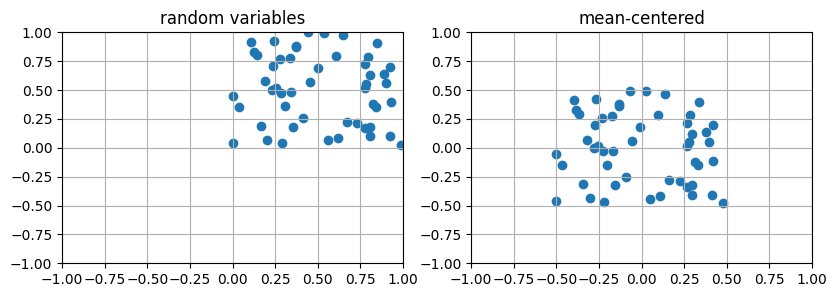

In [40]:
# Mean-centering variables
x = np.random.rand(5,10)
y = np.random.rand(5,10)
# can also be done this way
# fig, axs = plt.subplots(1,2)
# axs[0].scatter(x,y)
plt.close()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[3,3])
fig.subplots_adjust(left=.0, right=2.5)
ax1.scatter(x,y)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
ax1.set_title("random variables")
ax1.grid()
ax2.scatter(x-np.mean(x), y-np.mean(y))
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.set_title("mean-centered")
ax2.grid()

,0,1,2,3,4,5,6,7,8,9
logarithmic,0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.945910,2.079442,2.197225,2.397895
linear,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
n log n,0.0,1.524924,3.625421,6.099695,8.851909,11.825612,14.983508,18.299086,21.752523,26.376848
quadratic,0.0,1.000000,4.000000,9.000000,16.000000,25.000000,36.000000,49.000000,64.000000,81.000000
exponential,1.0,2.000000,4.000000,8.000000,16.000000,32.000000,64.000000,128.000000,256.000000,512.000000
factorial,1.0,1.000000,2.000000,6.000000,24.000000,120.000000,720.000000,5040.000000,40320.000000,362880.000000


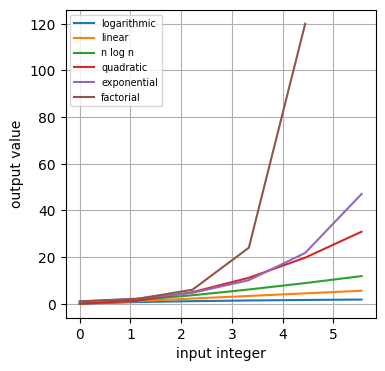

,logarithmic,linear,n log n,quadratic,exponential,factorial
logarithmic,1.000000,0.957504,0.919105,0.852108,0.656391,0.457370
linear,0.957504,1.000000,0.992544,0.962691,0.798837,0.576430
n log n,0.919105,0.992544,1.000000,0.988054,0.859290,0.648190
quadratic,0.852108,0.962691,0.988054,1.000000,0.914394,0.710131
exponential,0.656391,0.798837,0.859290,0.914394,1.000000,0.917079
factorial,0.457370,0.576430,0.648190,0.710131,0.917079,1.000000


In [41]:
a = np.linspace(0,10,10)
b = a
c = a**2
d = 2**a
a2 = np.linspace(0,11,11)
e = [math.log(int(x)) for x in a2 if x > 0]
f = [math.log(int(x))*x for x in a2 if x > 0]
g = [math.factorial(int(x)) for x in a2 if x > 0]

l = pd.Series([i for i in range(10)])
q = pd.Series([i**2 for i in range(10)])
e = pd.Series([2**i for i in range(10)])
logn = pd.Series([math.log(int(x)) for x in a2 if x > 0])
nlogn = pd.Series([math.log(int(x))*x for x in a2 if x > 0])
f = pd.Series([math.factorial(i) for i in range(10)])
df = pd.DataFrame([logn,l,nlogn,q,e,f], index=["logarithmic","linear","n log n","quadratic","exponential","factorial"])

display(df)

plt.close()
plt.figure(figsize=[4,4])
plt.plot(a[:6],logn[:6],label="logarithmic")
plt.plot(a[:6],b[:6],label="linear")
plt.plot(a[:6],nlogn[:6],label="n log n")
plt.plot(a[:6],c[:6],label="quadratic")
plt.plot(a[:6],d[:6],label="exponential")
plt.plot(a[:5],g[:5],label="factorial")
plt.xlabel("input integer")
plt.ylabel("output value")
plt.grid()
plt.legend(fontsize="x-small")
plt.show()

display(df.T.corr())

As the Big O complexity vectors above grow, their respective correlation coefficients describe how those vectors move apart, e.g. the correlation between the `log n` and `factorial` vectors is the smallest coefficient, as those vectors grow apart the fastest.

## Correlation vs. Cosine Similarity

Both give measures of similarity, but start from different assumptions.

In Pearson, [0,1,2,3] and [100,101,102,103] are perfectly correlated $(\rho=1)$.

But the cosine similarity is .808, because the variables are a different numeric scale.

## Cosine Distance

In [42]:
print("cosine distance from", a)
df = pd.DataFrame([scipy.spatial.distance.cosine(a,func) for func in [logn,l,nlogn,q,e,f]], index=["logarithmic","linear","n log n","quadratic","exponential","factorial"]).T
df.index = ["cosine distance"]
df

cosine distance from [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


,logarithmic,linear,n log n,quadratic,exponential,factorial
cosine distance,0.018452,2.220446e-16,0.005042,0.031301,0.179017,0.411332


## K-means Clustering

1. Initialize $k$ centroids.
2. Compute the Euclidean distance between each data observation (sample) and each centroid.
3. Assign each data observation to the group with the closest centroid.
4. Update each centroid as the average of all data observations assigned to that centroid.
5. Repeat steps 2-4 until a convergence criteria is satisfied, or for $N$ iterations.

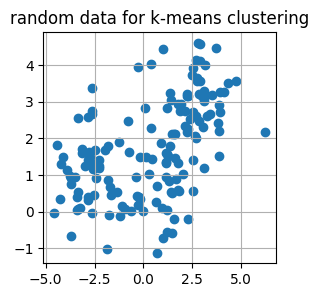

In [43]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatenate into a matrix
data = np.transpose(np.concatenate((a,b,c),axis=1))

plt.close()
plt.figure(figsize=(3, 3))
plt.scatter(data[:,0], data[:,1]) # array[row_start:row_stop:row_step, col_start:col_stop:col_step]
plt.title("random data for k-means clustering")
plt.grid()
plt.show()

In [44]:
# STEP 1
# use a random choice of 3 indices to select 3 random centroids
k = 3 # centroids
random_index = np.random.choice(range(len(data)), k, replace=False)
centroids = data[random_index,:] # rows are samples, columns are features
print(centroids)

[[1.15301096 1.34634707]
 [1.24979212 1.52660073]
 [3.87060911 1.5205758 ]]


The Euclidean distance formula for one data observation and centroid can be computed as:

$$\delta_{i,j}=\sqrt{(d^x_i-c^x_j)^2+(d^y_i-c^y_j)^2}$$

where $\delta_{i,j}$ is the distance from data observation $i$ ot centroid $j$, $d^x_i$ is feature $x$ of the $i$th data observation, and $c^x_j$ is the $x$-axis coordinate of centroid $j$.

In [45]:
# STEP 2
# compute the distances from data observations to centroids
distances = np.zeros((data.shape[0], k))
for ci in range(k):
    distances[:, ci] = np.sum((data-centroids[ci,:])**2, axis=1)

Data is size 150 x 2 (observations by features) and centroids[ci, :] is 1 x 2 (cluster ci by features). Python broadcasts the cluster centroids 150 times, subtracting the centroid from each data observation. Then the exponent operation **2 is applied element-wise, and the axis=1 tells Python to sum across the columns, separately per row. So the output of np.sum() is a 150 x 1 array that encodes the Euclidean distance from each point to centroid ci.

The square root of the original Euclidean distance formula isn't used because distance and squared distance are monotonic, so the square root is skipped to save on computation.

In [46]:
# STEP 3 
# assign to groups (classify) based on minimum distances
group_index = np.argmin(distances, axis=1)

# recompute and migrate centroids
for ki in range(k):
    centroids[ki, :] = [np.mean(data[group_index==ki,0]), np.mean(data[group_index==ki,1])]

Here we loop over $k$ clusters, and use indexing to find al the data points assigned to each cluster.

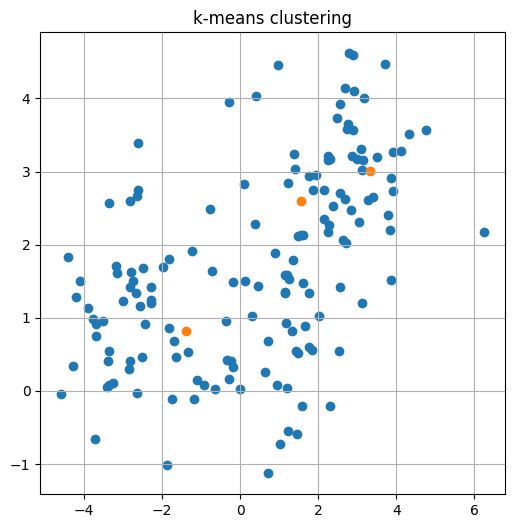

In [47]:
# run the procedure, starting with computing the distances from data to centroids
# until some convergence criteria
plt.close()
plt.figure(figsize=[6,6])
plt.scatter(data[:,0], data[:,1])
plt.scatter(centroids[:,0], centroids[:,1])
plt.title('k-means clustering')
plt.grid()
plt.show()

## Filtering and Feature Detection with a kernal and the dot product

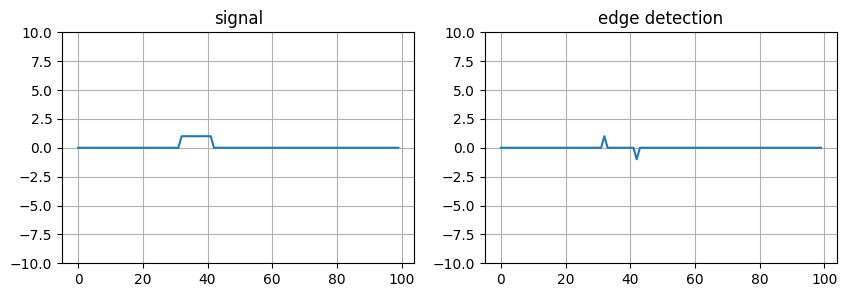

In [48]:
# a random signal with plateau function
signal = np.zeros(100)
modulation = np.random.choice(range(89))
signal[modulation:modulation+10] = 1

# use the dot product to detect changes in the signal
kernel = np.array([-1,1])
detected_features = np.zeros(len(signal))
for step in range(len(signal)-1):
    _ = np.array([signal[step], signal[step+1]])
    detected_features[step+1] = np.dot(kernel, _)

plt.close()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,3])
ax1.plot(signal)
ax2.plot(detected_features)
ax1.set_ylim(-10,10)
ax2.set_ylim(-10,10)
ax1.set_title('signal')
ax2.set_title('edge detection')
ax1.grid(); ax2.grid()

## Signal Smoothing with a kernel and dot product

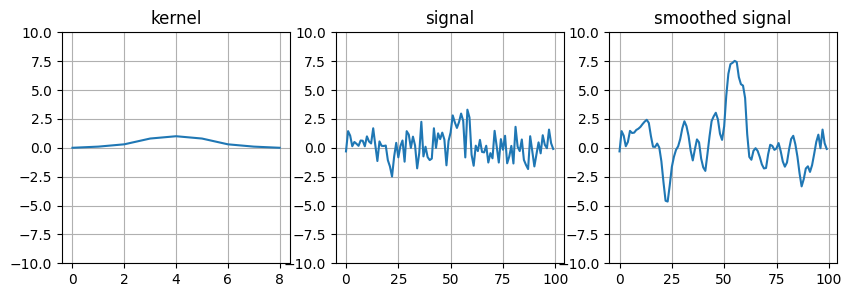

In [49]:
# a random signal with plateau function
signal = np.random.randn(100)

# creates an obvious magnitude spike for illustration
signal[50:60] = signal[50:60]+2

# use the dot product to detect changes in the signal
kernel = np.array([0, 0.1, 0.3, 0.8, 1, 0.8, 0.3, 0.1, 0])
klen = len(kernel)
half_klen = klen // 2

smoothed_signal = signal.copy()
for t in range(half_klen+1,len(signal)-half_klen):
    smoothed_signal[t] = np.dot(kernel,signal[t-half_klen-1:t+half_klen])

plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[10,3])
ax1.plot(kernel)
ax2.plot(signal)
ax3.plot(smoothed_signal)
ax1.set_ylim(-10,10)
ax2.set_ylim(-10,10)
ax3.set_ylim(-10,10)
ax1.set_title('kernel')
ax2.set_title('signal')
ax3.set_title('smoothed signal')
ax1.grid(); ax2.grid(); ax3.grid()

# Matrices

$$
\begin{bmatrix}
1 & 2\\
\pi & 4\\
6 & 7
\end{bmatrix}
\quad
\begin{bmatrix}
-6 & 1/3\\
e^{4.3} & -1.4\\
6/5 & 0
\end{bmatrix}
$$

Denoted with bold letters like matrix $\mathbf{A}$.

Size indicated with (row, column).

For instance, a 3 x 5 matrix has three rows and five columns: 
$$
\mathbf{M} =
\begin{bmatrix}
1 & 3 & 5 & 7 & 9\\
0 & 2 & 4 & 6 & 8\\
1 & 4 & 7 & 8 & 9
\end{bmatrix}
$$

Reference elements by indexing row and column, so the 3rd row and 4th column of matrix $\mathbf{M}$ would be $m_{3,4}=8$.

**Note**, math is 1-based indexing, while Python is 0-based indexing.

In [50]:
# Matrix slicing
M = np.arange(50).reshape(5,10)

# or

# mrows = 5
# ncols = 10
# M = np.random.randn(mrows, ncols)

submatrix = M[1:4:1, 0:5:1]
print('Original matrix:', '\n', M)
print('Submatrix:', '\n', submatrix)

Original matrix: 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
Submatrix: 
 [[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


square matrix
[[ 0.20506729  0.19002705 -0.13347794  0.51432436 -0.92360568]
 [ 2.05259174  1.07417625 -0.86634622  0.7323486  -2.18167047]
 [-0.62616549  1.72927963 -0.54482496  0.50680613 -0.95568618]
 [ 0.21561591  0.53563309 -0.82435708 -0.97913521 -0.58884588]
 [-0.88019787 -0.73069613  0.03084845  1.35709043 -0.67051336]]


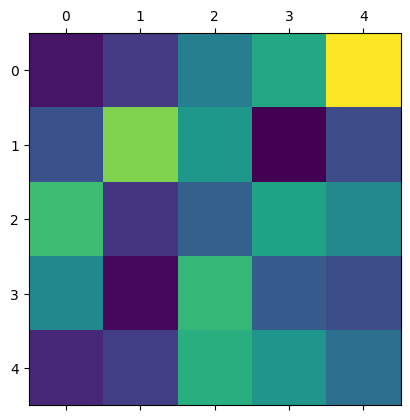

In [51]:
m = 5
n = 5
print('square matrix')
print(np.random.randn(m, n))
plt.close()
plt.matshow(np.random.randn(m, n))

rectangular matrix
[[ 1.3434977   2.00861461  0.40310627 -1.98495287  1.24525851]
 [ 0.26479317 -1.49440008 -1.00360699 -1.48968925  0.18978353]
 [-0.51554791  0.688884    0.739207   -1.63448608  1.71360657]
 [-0.55619659  0.9618008   1.23265705 -0.16694011  0.38768984]
 [ 1.36749491 -0.65898318  1.19122964 -1.64226141 -0.35275342]
 [ 0.03796679  0.2301384  -0.27248168 -1.75541185 -0.10947824]
 [ 1.34825867 -0.38410047 -0.3964205  -1.67679597 -0.39566738]
 [-0.19028137 -0.37258782  1.80334104  0.81566823 -0.40238274]
 [ 0.19667777 -1.76577626  1.09186304 -0.3800391  -0.02803962]
 [ 0.52000838 -0.55934539 -2.58665978 -0.0526669   1.39719361]]


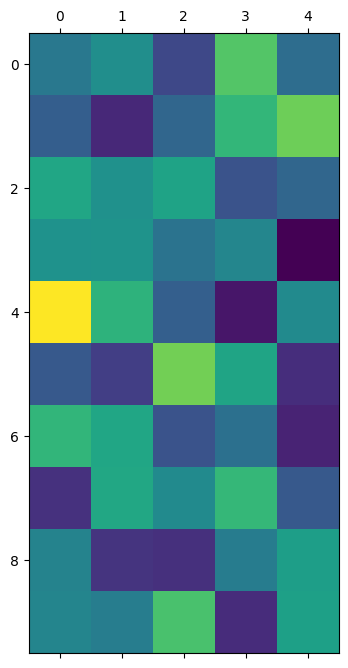

In [52]:
m = 10
n = 5
print('rectangular matrix')
print(np.random.randn(m, n))
plt.close()
plt.matshow(np.random.randn(m, n))

diagonal matrix
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 9]]


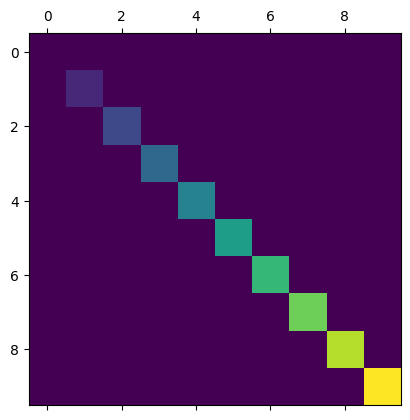

In [53]:
print('diagonal matrix')
print(np.diag(range(10)))
plt.close()
plt.matshow(np.diag(range(10)))

upper triangular matrix
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 0 2 3 4 5 6 7 8 9]
 [0 0 0 3 4 5 6 7 8 9]
 [0 0 0 0 4 5 6 7 8 9]
 [0 0 0 0 0 5 6 7 8 9]
 [0 0 0 0 0 0 6 7 8 9]
 [0 0 0 0 0 0 0 7 8 9]
 [0 0 0 0 0 0 0 0 8 9]
 [0 0 0 0 0 0 0 0 0 9]]


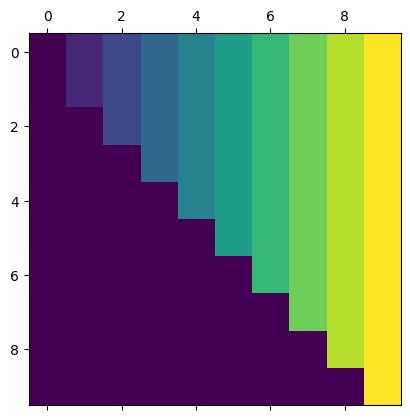

In [54]:
print('upper triangular matrix')
print(np.triu(range(10)))
plt.close()
plt.matshow(np.triu(range(10)))

lower triangular matrix
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 2 0 0 0 0 0 0 0]
 [0 1 2 3 0 0 0 0 0 0]
 [0 1 2 3 4 0 0 0 0 0]
 [0 1 2 3 4 5 0 0 0 0]
 [0 1 2 3 4 5 6 0 0 0]
 [0 1 2 3 4 5 6 7 0 0]
 [0 1 2 3 4 5 6 7 8 0]
 [0 1 2 3 4 5 6 7 8 9]]


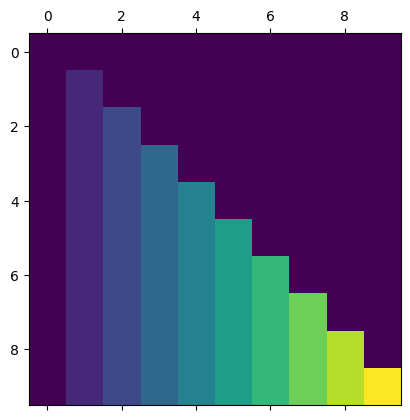

In [55]:
print('lower triangular matrix')
plt.close()
print(np.tril(range(10)))
plt.matshow(np.tril(range(10)))

The identity matrix is a square diagonal matrix with all diagonal elements set to 1.

Denoted $\mathbf{I}$ or $\mathbf{I}_5$ to indicate a 5x5 matrix.

Any matrix of vector times the identity matrix is that same matrix of vector; the identity matrix is the equivalent of the number 1.

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


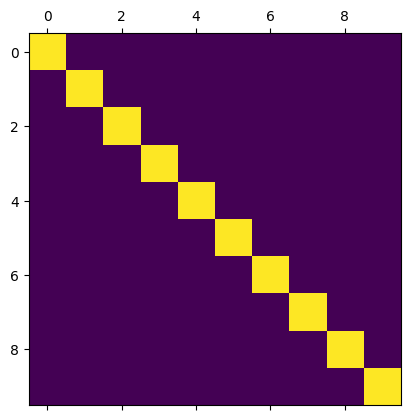

In [56]:
print(np.eye(10))
plt.close()
plt.matshow(np.eye(10))

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 0.  1.  2.  3.  4.]
 [10. 11. 12. 13. 14.]
 [20. 21. 22. 23. 24.]
 [30. 31. 32. 33. 34.]
 [40. 41. 42. 43. 44.]]


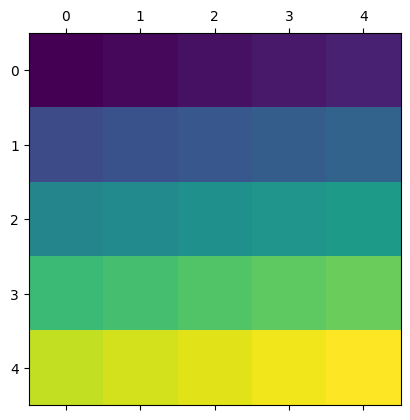

In [57]:
# matrix multiplication
print(M[:5,:5])
plt.close()
plt.matshow(M[:5,:5])
print(M[:5,:5]@np.eye(5))
plt.close()
plt.matshow(M[:5,:5]@np.eye(5))

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ -0.  -0.  -0.  -0.  -0.]
 [ -0. -11.  -0.  -0.  -0.]
 [ -0.  -0. -22.  -0.  -0.]
 [ -0.  -0.  -0. -33.  -0.]
 [ -0.  -0.  -0.  -0. -44.]]


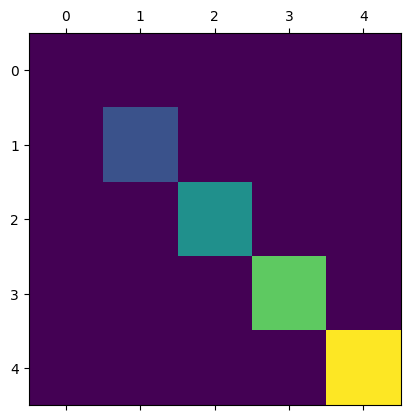

In [58]:
# element-wish multiplication
print(M[:5,:5])
plt.close()
plt.matshow(M[:5,:5])
print(M[:5,:5]*-np.eye(5))
plt.close()
plt.matshow(M[:5,:5]*np.eye(5))

In [59]:
# zeros or zero matrix
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## Adding and Subtracting Matrices

$$
\begin{bmatrix}
0&1&2\\
0&-1&-2
\end{bmatrix}
+
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
=
\begin{bmatrix}
(0 + 1) & (1 + 2) & (2+3)\\
(0 + 4) & (-1 + 5) & (-2 + 6)
\end{bmatrix}
=
\begin{bmatrix}
1 & 3 & 5\\
4 & 4 & 4
\end{bmatrix}
$$

In [60]:
# add two row vectors
a = np.array([[0,1,2],[0,-1,-2]])
b = np.array([[1,2,3],[4,5,6]])
print("a", a)
print("+")
print("b", b)
a+b

a [[ 0  1  2]
 [ 0 -1 -2]]
+
b [[1 2 3]
 [4 5 6]]


array([[1, 3, 5],
       [4, 4, 4]])

In [61]:
# add two row vectors
a = np.array([[0,1,2],[0,-1,-2]])
b = np.array([[1,2,3],[4,5,6]])
print("a", a)
print("-")
print("b", b)
a-b

a [[ 0  1  2]
 [ 0 -1 -2]]
-
b [[1 2 3]
 [4 5 6]]


array([[-1, -1, -1],
       [-4, -6, -8]])

## Shifting a Matrix, or adding a scalar

It isn't formally possible to add a scalar to a matrix like $\lambda+\mathbf{A}$.

Python allows broadcasting a scalar to all the elements of a matrix, like:

In [62]:
np.zeros((5,5))+3

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

In linear algebra, you can *shift* a matrix by adding a constant value to the diagonal, implemented by adding a scalar multiplied identity matrix like $\mathbf{A}+\lambda\mathbf{I}$:

$$
\begin{bmatrix}
4 & 5 & 1\\
0 & 1 & 11\\
4 & 9 & 7
\end{bmatrix}
+
6
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
10 & 5 & 1\\
0 & 7 & 11\\
4 & 9 & 13
\end{bmatrix}
$$

In [63]:
A = np.array([ [4,5,1],[0,1,11],[4,9,7] ])
s = 6
print(A)
print("Not shifting; broadcasting")
print(A + s)
print("Shifting")
print(A + s*np.eye(len(A)))

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
Not shifting; broadcasting
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
Shifting
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


Shifting is the mechanism for finding eigenvalues of a matrix, and regularizing matrices when fitting models to data.

## Scalar and Hadamard Multiplications

Both are element-wise operations.

**Scalar**:

$$
\gamma
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
=
\begin{bmatrix}
\gamma a & \gamma b\\
\gamma c & \gamma d
\end{bmatrix}
$$

**Hadamard**:

$$
\begin{bmatrix}
2 & 3\\
4 & 5
\end{bmatrix}
\odot
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
=
\begin{bmatrix}
2a & 3b\\
4c & 5d
\end{bmatrix}
$$

In [64]:
# scalar multiplication
print("A")
print(A)
print("A+6")
print(A+6)

A
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
A+6
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]


In [65]:
# hadamard
print("A*B")
print(A * A)
print("np.multiply()")
print(np.multiply(A, A))

A*B
[[ 16  25   1]
 [  0   1 121]
 [ 16  81  49]]
np.multiply()
[[ 16  25   1]
 [  0   1 121]
 [ 16  81  49]]


## Matrix Multiplication

Rather than element-wise, matrix multiplication operates row/column-wise. Standard matrix multiplication reduces to a systematic collection of dot products between rows of one matrix and the columns of the other matrix. **Matrix multiplication is an organized collection of dot products between rows of the left matrix and columns of the right matrix.**

### Rules for MatMul Validity

Matrices are written as $M\times N$, rows by columns.

Two matrices multiplying each other can have different sizes. So the size of the first matrix is $M \times N$, and the second is $N \times K$.

$$
\begin{bmatrix}
0 & 1 & 2\\
3 & 4 & 5
\end{bmatrix}
@
\begin{bmatrix}
0 & 1\\
2 & 3\\
4 & 5
\end{bmatrix}
$$
$$
M \times N\,@\,N\color{black} \times K = M \times K
$$

If the "inner" dimensions match, the matrix multiplication is valid, and the size of the product is defined by the "outer" dimensions. 

Put another way, matmul is valid with the number of columns on the left matches the number of rows on the right, and the size of the product is defined by the number of rows on the left, and the number of columns on the right.
$$
\begin{bmatrix}
2 & 3\\
4 & 5
\end{bmatrix}
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
=
\begin{bmatrix}
(2a+3c)&(2b+3d)\\
(4a+5c)&(4b+5d)
\end{bmatrix}
$$

THe dot product is a number that encodes the relationship between two vectors. So, the result of matrix multiplication is a matrix that stores all the pairwise linear relationships between rows of the left matrix and the columns of the right.

In [66]:
A = np.array([ [0,1,2],[3,4,5] ])
B = np.array([ [0,1],[2,3],[4,5] ])
C = A@B
print("A", A.shape)
print(A,'\n')
print("B", B.shape)
print(B,'\n')
print("A@B", C.shape)
print(C)

A (2, 3)
[[0 1 2]
 [3 4 5]] 

B (3, 2)
[[0 1]
 [2 3]
 [4 5]] 

A@B (2, 2)
[[10 13]
 [28 40]]


## Matrix-vector Multiplication

Multiplying a matrix and a vector is not a special operation. The same dimensionality rule applies.

In [67]:
A

array([[0, 1, 2],
       [3, 4, 5]])

In [68]:
v = np.array([0,1,2]) # row vector

print(A@v)
print(A.shape, '@', v.shape)
print((A@v).shape)

[ 5 14]
(2, 3) @ (3,)
(2,)


Matrix-vector multiplication always results in a vector. The orientation depends on the orientation of the multiplicand vector.

In [69]:
v = np.array([[0,1,2]]).T # transposed to columnar

print(A@v)
print(A.shape, '@', v.shape)
print((A@v).shape)

[[ 5]
 [14]]
(2, 3) @ (3, 1)
(2, 1)


## Matrix-vector Multiplication for Linear Weighted Combinations

Put the individual vectors into a matrix, and the weights into the corresponding elements of a vector:

$$
4
\begin{bmatrix}
3\\0\\6
\end{bmatrix}
+ 3
\begin{bmatrix}
1\\2\\5
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
3 & 1\\
0 & 2\\
6 & 5
\end{bmatrix}
\begin{bmatrix}
4\\3
\end{bmatrix}
=
\begin{bmatrix}
(3*4)+(1*3)\\
(0*4)+(2*3)\\
(6*4)+(5*3)
\end{bmatrix}
=
\begin{bmatrix}
15\\6\\39
\end{bmatrix}
$$

In [70]:
a = np.array([ [3,0,6],[1,2,5],])
b = np.array([4,3])

a.T@b

array([15,  6, 39])

## Geometric Transforms

Matrix-vector multiplication is a way of rotating and scaling vectors (scalar-vector multiplication can only scale).

In [71]:
M = np.array([ [2,3],[2,1] ])
x = np.array([ [1,1.5] ]).T # composed as a row vector, then transposed
Mx = M@x
print(Mx)

[[6.5]
 [3.5]]


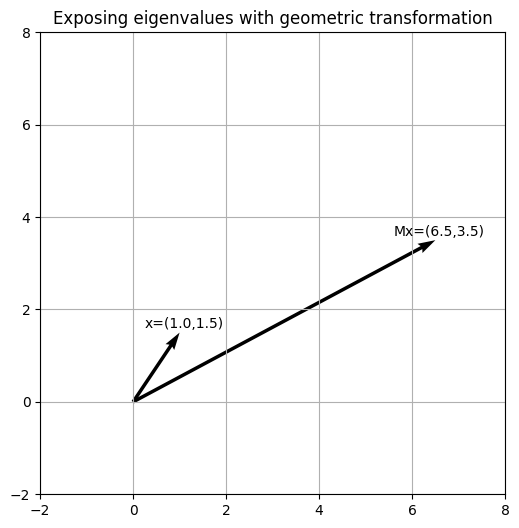

In [72]:
# this gets further explained later
plt.close()
plt.figure(figsize=[6,6])
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.grid()
plt.quiver(0,0,x[0],x[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,Mx[0],Mx[1], angles='xy', scale_units='xy', scale=1)
plt.annotate(f"x=({x[0][0]},{x[1][0]})", xy=x, xytext=(3, 3), textcoords="offset points", ha="center")
plt.annotate(f"Mx=({Mx[0][0]},{Mx[1][0]})", xy=Mx, xytext=(3, 3), textcoords="offset points", ha="center")
plt.title('Exposing eigenvalues with geometric transformation')
plt.show()

## Norms

In [73]:
# Frobenius/Euclidean/l2 norm matrix distance
# computed as the square root
# of the sum of the squared elements
A = np.array([[4,0,9],[5,1,9],[9,9,9]])
B = np.array([[0,0,1],[0,8,2],[0,0,6]])
np.linalg.norm(A)-np.linalg.norm(B)

np.float64(10.895423745906376)

## Trace

The trace of a matrix is the sum of the diagonal elements.

In [74]:
np.trace(A)

np.int64(14)

In [75]:
np.trace(B)

np.int64(14)

In [76]:
# Euclidean/Frobenius norm can also be computed as
# the square root of the trace 
# of the matrix times its transpose
print(np.linalg.norm(A))
print(math.sqrt(np.trace(A.T @ A)))

21.142374511865974
21.142374511865974


## Matrix Space

There are 4 matrix spaces: column, row, null, left-null. They are defined as the set of linear weighted combinations of different features of the matrix.

- Column space comprises all the linear weighted combinations of the columns in the matrix and is written $C(\mathbf{A})$.
- Row space comprises all the linear weighted combinations of the rows in the matrix and is written $R(\mathbf{A})$ or $C(\mathbf{A}^T)$.


## Null Space

Null space is the set of non-trivial vectors such that, given a matrix $\mathbf{A}$ and a vector $\mathbf{y}$, $\mathbf{Ay}=\mathbf{0}$. It is the set of vectors that linearly combines the columns to produce the zeros vector--in other words, any vector $\mathbf{y}$ that solves the equation $\mathbf{Ay}=\mathbf{0}$. The trivial solution $\mathbf{y}=\mathbf{0}$ is excluded. The null space is important for finding eigenvectors and other things.

Full-rank and full column-rank matrices have empty null spaces, whereas reduced-rank matrices have nonempty(nontrivial) null spaces. The null space is empty when the columns of the matrix form a linearly independent set.

In [77]:
# A is a reduced-rank matrix and so
# has a non-trivial null space.
A = np.array([[1,-1],[-2,2]]) 
y = scipy.linalg.null_space(A)
print("matrix A:\n", A, "\n")
print("rank:", np.linalg.matrix_rank(A), "\n")
print("null space:\n", A*y)

matrix A:
 [[ 1 -1]
 [-2  2]] 

rank: 1 

null space:
 [[ 0.70710678 -0.70710678]
 [-1.41421356  1.41421356]]


In [78]:
# B is a full-rank matrix and so
# it's null space is an empty set
# thus, the code fails
B = np.array([[1,-1],[-2,3]]) 
y = scipy.linalg.null_space(B)
print("matrix A:\n", B, "\n")
print("rank:", np.linalg.matrix_rank(B), "\n")
try:
    print("null space:\n", B*y)
except ValueError as e:
    print("Failed to calculate nullspace because", e)

matrix A:
 [[ 1 -1]
 [-2  3]] 

rank: 2 

Failed to calculate nullspace because operands could not be broadcast together with shapes (2,2) (2,0) 


## Rank
Rank is a non-negative integer associated with a matrix. It reflects the largest number of columns (or rows) that can form a linearly independent set. Matrices with a rank smaller than the maximum possible are called reduced-rank or singular.

### Reduced Rank
A matrix is reduced-rank if at least one column can be expressed as a linear combination of other columns.

In [79]:
# Max rank is the smaller of its row or column count
# i.e. Max rank = min{M,N}
# TODO: Add check for linear independence first
# because vectors must be linearly independent
def matrank(m):
    """Only works for linearly independent matrices."""
    print('Rank:', min(m.shape))

A = np.array([[1,1,-4],[2,-2,2]])
B = np.eye(6)
matrank(A)
matrank(B)
print('Np rank:', np.linalg.matrix_rank(A))
print('Np rank:', np.linalg.matrix_rank(B))

Rank: 2
Rank: 6
Np rank: 2
Np rank: 6


In [80]:
# matrix augmentation
A = np.asmatrix([[4,5,6],[0,1,2],[9,9,4]])
v = np.array([1,2,3])

# transpose into a column vector
print(v.reshape(-1,1).__repr__())

np.hstack((A, v.reshape(-1,1)))

array([[1],
       [2],
       [3]])


matrix([[4, 5, 6, 1],
        [0, 1, 2, 2],
        [9, 9, 4, 3]])

In [81]:
# matrix augmentation a second way
A = np.asmatrix([[4,5,6],[0,1,2],[9,9,4]])
v = np.array([[1,2,3]]) # make a 1D matrix

# transpose into a column vector
print(v.reshape(-1,1).__repr__())

np.hstack((A, v.T)) # transpose instead of reshape

array([[1],
       [2],
       [3]])


matrix([[4, 5, 6, 1],
        [0, 1, 2, 2],
        [9, 9, 4, 3]])

## Determine if a Vector is in Matrix Column Space

1. **Augment the matrix with the vector**. The original matrix is $\mathbf{A}$, and the augmented matrix is $\mathbf{\widetilde{A}}$.
2. **Compute the ranks of the two matrices**.
3. **Compare the two ranks**. There will be one of two possible outcomes:
- $rank(\mathbf{A})=rank(\mathbf{\widetilde{A}})$. Vector $\mathbf{v}$ is in the column space of matrix $\mathbf{A}$.
- $rank(\mathbf{A})<rank(\mathbf{\widetilde{A}})$. Vector $\mathbf{v}$ is **not** in the column space of matrix $\mathbf{A}$.

If $\mathbf{v}\in C(\mathbf{A})$, then $\mathbf{v}$ can be expressed as some linear weighted combination of the columns of $\mathbf{A}$. The columns of the augmented matrix $\widetilde{\mathbf{A}}$ form a linearly dependent set. In terms of span, vector $\mathbf{v}$ is redundant in $\widetilde{\mathbf{A}}$. Hence, rank remains the same.

Conversely, if $\mathbf{v}\notin C(\mathbf{A})$, then $\mathbf{v}$ cannot be expressed as a linear weighted combination of the columns of $\mathbf{A}$, which means that $\mathbf{v}$ has added new inforrmation into $\widetilde{\mathbf{A}}$. And that means the rank will increase by 1.

## Determining Linear Independence of a Vector Set

In [82]:
# place vectors in a matrix
a = np.arange(0,5)
b = np.arange(1,6)
c = np.arange(2,7)
A = np.asmatrix([a,b,c])
M = A.shape[0]
N = A.shape[1]

# compute the rank of the matrix
r = np.linalg.matrix_rank(A)

# compare that rank to the maximum possible rank of that matrix: min(M,N).
maxM = min(A.shape)

# possible outcomes: 
# r = M: The vector set is linearly independent.
# r < M: The vector set is linearly dependent.
if r < M: 
    print('Dependent')
elif r == M:
    print('Independent')
else:
    print('Fail')

Dependent


In [83]:
# place vectors in a matrix
a = np.random.randint(1,5,5)
b = np.random.randint(1,5,5)
c = np.random.randint(1,5,5)
A = np.asmatrix([a,b,c])
M = A.shape[0]
N = A.shape[1]

# compute the rank of the matrix
r = np.linalg.matrix_rank(A)

# compare that rank to the maximum possible rank of that matrix: min(M,N).
maxM = min(A.shape)

# possible outcomes: 
# r = M: The vector set is linearly independent.
# r < M: The vector set is linearly dependent.
if r < M: 
    print('Dependent')
elif r == M:
    print('Independent')
else:
    print('Fail')

Independent


If the rank is smaller than the number of columns, then at least one column can be described as a linear combination of the other columns. If the rank equals the number of columns, then each column contributes unique information to the matrix, which means that no column can be described as a linear combination of others.

## Determinant

Denoted $det(\mathbf{A})$ or $|\mathbf{A}|$. Greek capital delta $\Delta$ can be used when not referring to a specific matrix.

My book by Mike Cohen suggests computing the determinant is an awful experience and "if I live a thousand years" without doing it by hand it will be worth it. I read his quick explanation of why this is true, and can verify I won't even be attempting it. I get it, it's horrific and onerous and it's 2024 so let's come back to that when we have time and money in surplus.

`np.linalg.det()` or `scipy.linalg.det()` will do nicely. **Note, the determinant is done on a square matrix.**

Reduced-rank matrices have a determinant $\Delta=0$.
Full-rank matrices have a non-zero determinant $\Delta\ne 0$.

$\Delta=0$ can be geometrically interpreted as a matrix transformation in which at least one dimension gets flattened to have a surface area but no volume.

In [84]:
A = np.asmatrix([
    np.random.randint(1,5,5),
    np.random.randint(1,5,5),
    np.random.randint(1,5,5),
    np.random.randint(1,5,5),
    np.random.randint(1,5,5)
])
np.linalg.det(A)

np.float64(140.00000000000006)

In [85]:
A = np.asmatrix([
    np.arange(0,5),
    np.arange(1,6),
    np.arange(2,7),
    np.arange(3,8),
    np.arange(4,9)
])
np.linalg.det(A)

np.float64(0.0)

## Characteristic Polynomial

Combining shifting a matrix with the determinant is called the *characteristic polynomial*.
$$det(\mathbf{A}-\lambda\mathbf{I})=\Delta$$

It transforms a square matrix, shifted by $\lambda$, into an equation that equals the determinant. Knowing the determinant allows you to solve for $\lambda$.

In [86]:
lambda_coef = -2
A = np.asmatrix([
    np.array([1,3]),
    np.array([3,1])
])

In [87]:
A

matrix([[1, 3],
        [3, 1]])

In [88]:
I = lambda_coef * np.eye(2)

In [89]:
print("The shifted matrix.")
print(A - I)

The shifted matrix.
[[3. 3.]
 [3. 3.]]


In [90]:
print("The characteristic polynomial", np.linalg.det(A-I))

The characteristic polynomial 0.0


# Matrix Applications

## Multivariate Data Covariance Matrices
Covariance is interpreted the same as correlation: when variables move together it is positive, negative when they move apart, and 0 if there is no linear relationship. That's because covariance is the dot product between two mean-centered variables. It's the numerator of the [Pearson correlation coefficient](#Pearson-correlation-coefficient):

$$c_{a,b} = (n-1)^{-1}\sum^n_{i=1}(x_i - \bar{x})(y_i - \bar{y})$$

$x^{-1}=\frac{1}{x}$. And, as in the Pearson correlation coefficient, if $\mathbf{\widetilde{x}}$ is the mean-centered variable $\mathbf{x}$, and $$\mathbf{\widetilde{x}}^\text{T}\mathbf{\widetilde{y}}\frac{1}{n-1}$$ then covariance is simply $$\frac{\mathbf{\widetilde{x}}^\text{T}\mathbf{\widetilde{y}}}{n-1}$$
Covariance has a normalization factor of $n-1$, where n is the number of data points. Normalization prevents the covariance from growing larger as you sum more data values together. It's analogous to dividing by $N$ to transform a sum into an average.

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.041763,-0.159510,0.263881,0.114779,0.081975,0.010811,-0.089436,0.280328,0.405852,-0.013360,...,0.165725,-0.084154,-0.254998,0.190940,-0.128467,-0.021183,-0.143312,-0.019041,0.010666,0.323232
1,-0.159510,0.609240,-1.007877,-0.438391,-0.313098,-0.041291,0.341595,-1.070696,-1.550127,0.051028,...,-0.632976,0.321421,0.973950,-0.729283,0.490673,0.080906,0.547372,0.072726,-0.040739,-1.234566
2,0.263881,-1.007877,1.667351,0.725238,0.517964,0.068308,-0.565108,1.771273,2.564405,-0.084416,...,1.047144,-0.531732,-1.611224,1.206468,-0.811730,-0.133844,-0.905528,-0.120312,0.067396,2.042367
3,0.114779,-0.438391,0.725238,0.315453,0.225296,0.029711,-0.245802,0.770441,1.115425,-0.036718,...,0.455470,-0.231285,-0.700825,0.524770,-0.353074,-0.058217,-0.393872,-0.052331,0.029315,0.888357
4,0.081975,-0.313098,0.517964,0.225296,0.160906,0.021220,-0.175551,0.550248,0.796635,-0.026224,...,0.325296,-0.165183,-0.500528,0.374790,-0.252165,-0.041579,-0.281303,-0.037375,0.020937,0.634463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.021183,0.080906,-0.133844,-0.058217,-0.041579,-0.005483,0.045363,-0.142186,-0.205854,0.006776,...,-0.084058,0.042684,0.129339,-0.096848,0.065161,0.010744,0.072690,0.009658,-0.005410,-0.163948
146,-0.143312,0.547372,-0.905528,-0.393872,-0.281303,-0.037098,0.306907,-0.961968,-1.392713,0.045846,...,-0.568698,0.288781,0.875046,-0.655226,0.440846,0.072690,0.491787,0.065341,-0.036602,-1.109197
147,-0.019041,0.072726,-0.120312,-0.052331,-0.037375,-0.004929,0.040777,-0.127811,-0.185041,0.006091,...,-0.075559,0.038369,0.116262,-0.087056,0.058573,0.009658,0.065341,0.008681,-0.004863,-0.147372
148,0.010666,-0.040739,0.067396,0.029315,0.020937,0.002761,-0.022842,0.071596,0.103655,-0.003412,...,0.042326,-0.021493,-0.065127,0.048766,-0.032811,-0.005410,-0.036602,-0.004863,0.002724,0.082554


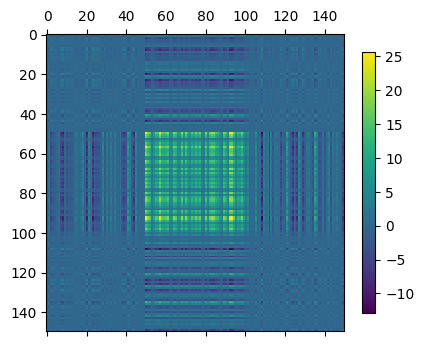

In [91]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatenate into a matrix
df = pd.DataFrame(np.transpose(np.concatenate((a,b,c),axis=1)))
plt.close()
display(df.T.cov())
plt.matshow(df.T.cov())
plt.colorbar(shrink=0.7)
plt.show()

# Unsurprising that the covariance of normally 
# distributed variables look normally distributed.

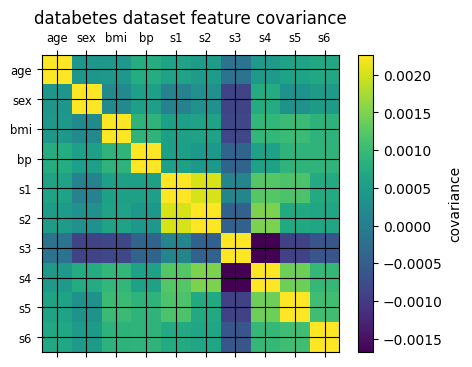

'Covariance'

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,0.002268,0.000394,0.000420,0.000761,0.000590,0.000497,-0.000170,0.000462,0.000614,0.000684
sex,0.000394,0.002268,0.000200,0.000547,0.000080,0.000323,-0.000860,0.000753,0.000340,0.000472
bmi,0.000420,0.000200,0.002268,0.000897,0.000566,0.000592,-0.000832,0.000938,0.001012,0.000881
bp,0.000761,0.000547,0.000897,0.002268,0.000550,0.000421,-0.000405,0.000584,0.000892,0.000885
s1,0.000590,0.000080,0.000566,0.000550,0.002268,0.002033,0.000117,0.001229,0.001169,0.000739
s2,0.000497,0.000323,0.000592,0.000421,0.002033,0.002268,-0.000445,0.001496,0.000722,0.000659
s3,-0.000170,-0.000860,-0.000832,-0.000405,0.000117,-0.000445,0.002268,-0.001675,-0.000904,-0.000621
s4,0.000462,0.000753,0.000938,0.000584,0.001229,0.001496,-0.001675,0.002268,0.001401,0.000946
s5,0.000614,0.000340,0.001012,0.000892,0.001169,0.000722,-0.000904,0.001401,0.002268,0.001054
s6,0.000684,0.000472,0.000881,0.000885,0.000739,0.000659,-0.000621,0.000946,0.001054,0.002268


'Pearson Correlation'

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.133422,0.130857,0.336938,0.013300,0.048891,-0.236175,0.176440,0.222424,0.278325
sex,0.133422,1.000000,0.157355,0.285229,-0.190311,0.064315,-0.658814,0.456403,0.224432,0.277263
bmi,0.130857,0.157355,1.000000,0.541766,0.180793,0.281303,-0.712453,0.631538,0.683579,0.598710
bp,0.336938,0.285229,0.541766,1.000000,-0.043910,0.011516,-0.490939,0.345899,0.485641,0.509215
s1,0.013300,-0.190311,0.180793,-0.043910,1.000000,0.940670,-0.218309,0.596356,0.483430,0.212958
s2,0.048891,0.064315,0.281303,0.011516,0.940670,1.000000,-0.431258,0.747821,0.478581,0.287479
s3,-0.236175,-0.658814,-0.712453,-0.490939,-0.218309,-0.431258,1.000000,-0.909878,-0.773827,-0.665174
s4,0.176440,0.456403,0.631538,0.345899,0.596356,0.747821,-0.909878,1.000000,0.827917,0.620933
s5,0.222424,0.224432,0.683579,0.485641,0.483430,0.478581,-0.773827,0.827917,1.000000,0.674504
s6,0.278325,0.277263,0.598710,0.509215,0.212958,0.287479,-0.665174,0.620933,0.674504,1.000000


In [92]:
# using the sklearn diabetes dataset
# note the similarities between
# correlation and covariance

from sklearn.datasets import load_diabetes
data = load_diabetes()
feature_names = data['feature_names']
plt.close()
df = pd.DataFrame(data['data']).cov()
df.columns = feature_names
df.index = feature_names
img = plt.matshow(df)
plt.title("databetes dataset feature covariance")
cbar = plt.colorbar(img, shrink=0.8, label="covariance")
plt.grid(color="black")
plt.xticks(ticks=[i for i in range(10)], labels=feature_names, fontsize="small")
plt.yticks(ticks=[i for i in range(10)], labels=feature_names, fontsize="small")
plt.show()
display("Covariance", df)
display("Pearson Correlation", df.corr())

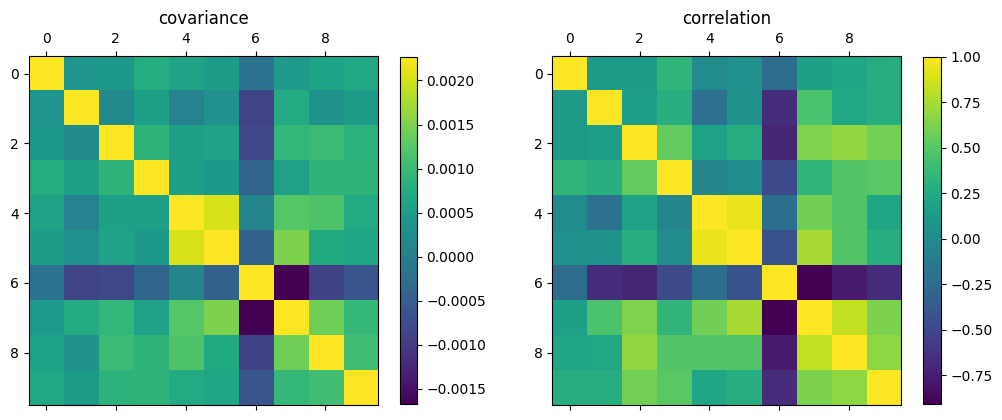

In [93]:
# Note that the correlation and covariance matrices are similar, 
# except that the scales are different. This is because covariance 
# retains the scale of the original data, and so is not bound to [-1,1].
plt.close()
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(left=1.0, right=2.5)
cov = axs[0].matshow(df)
fig.colorbar(cov, ax=axs[0], shrink=0.94)
axs[0].set_title("covariance")
cor = axs[1].matshow(df.corr())
fig.colorbar(cor, ax=axs[1], shrink=0.94)
axs[1].set_title("correlation")
plt.show()

Text(0.5, 1.0, 'manually calculated covariance')

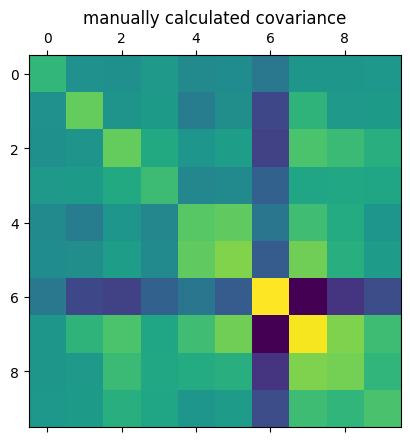

In [94]:
# a manual covariance matrix
means = np.mean(df, axis=0) # the vector of feature means
mean_centered_data = df - means
covariance_matrix = mean_centered_data.T @ mean_centered_data 
covariance_matrix /= (mean_centered_data.shape[0]-1) # divided by n-1
plt.close()
plt.matshow(covariance_matrix)
plt.title("manually calculated covariance")

## Geometric Transformations via Matrix-Vector Multiplication

Pure rotation matrices are used to rotate a vector while preserving its length. A 2D rotation matrix can be expressed as: 
$$
\mathbf{T}=
\begin{bmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

A pure rotation matrix is orthogonal. The columns of $\mathbf{T}$ are orthogonal because their dot product is $\cos(\theta)\sin(\theta)-\sin(\theta)\cos(\theta)$, and are unit vectors because of the Pythagorean trigonometric identity that $\cos^2(\theta)+sin^2(\theta)=1$.

In [95]:
# dot products of different angles for the rotation matrix
# a 0 dot product means the vectors are orthogonal
[(np.cos(theta)*np.sin(theta))-(np.sin(theta)*np.cos(theta)) for theta in np.arange(0,2*np.pi,1)]

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

In [96]:
# Pythagorean trig identity of different angles
[np.sin(theta)**2 + np.cos(theta)**2 for theta in np.arange(0,2*np.pi,1)]

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.9999999999999999),
 np.float64(1.0),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999)]

To use the transformation matrix $\mathbf{T}$, set $\theta$ to some angle of clockwise rotation, and multiply matrix $\mathbf{T}$ by a 2 x *N* matrix of geometric points, where each column in that matrix contains the (X,Y) coordinates for each of N data points.

Text(0.5, 1.0, 'Geometric transformation of a matrix')

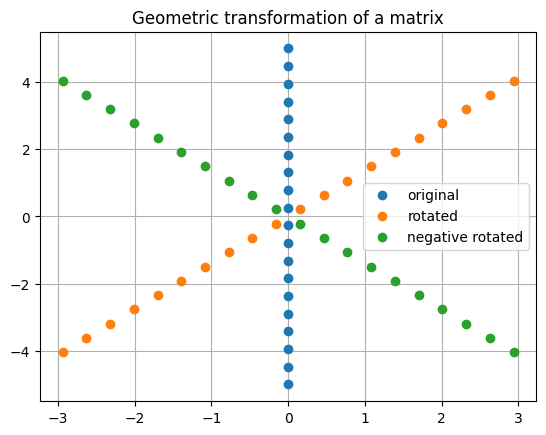

In [97]:
Y = np.linspace(-5, 5, 20)
X = np.array([0]*20)
v1 = np.array([X,Y])

theta = np.pi/5

# a positive rotation
T = np.array([
    [np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]
])

# a negative rotation
negT = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.sin(theta), -np.cos(theta)]
])

v2 = T @ v1
v3 = negT @ v1

plt.close()
plt.plot(v1[0], v1[1], "o", label="original")
plt.plot(v2[0], v2[1], "o", label="rotated")
plt.plot(v3[0], v3[1], "o", label="negative rotated")
plt.legend()
plt.grid()
plt.title("Geometric transformation of a matrix")

Geometric rotations are transformations, so you can also stretch or scale. In general, the diagonal elements scale the x-axis and y-axis coordinates, while the off-diagonal elements stretch both axes.

Text(0.5, 1.0, 'Geometric transformation of a matrix')

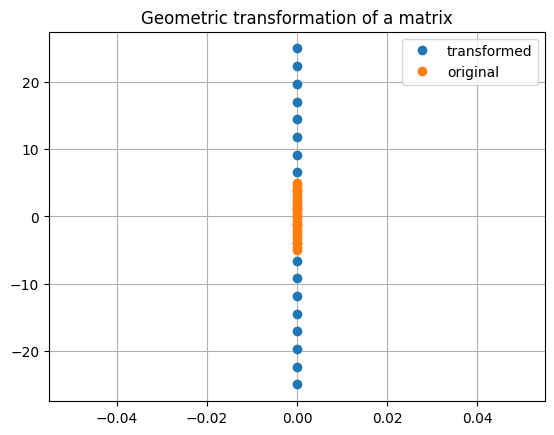

In [98]:
Y = np.linspace(-5, 5, 20)
X = np.array([0]*20)
v1 = np.array([X,Y])
theta = np.pi/5

T = np.array([
    [5, 0],
    [0, 5]
])

v2 = T @ v1

plt.close()
plt.plot(v2[0], v2[1], "o", label="transformed")
plt.plot(v1[0], v1[1], "o", label="original")
plt.legend()
plt.grid()
plt.title("Geometric transformation of a matrix")

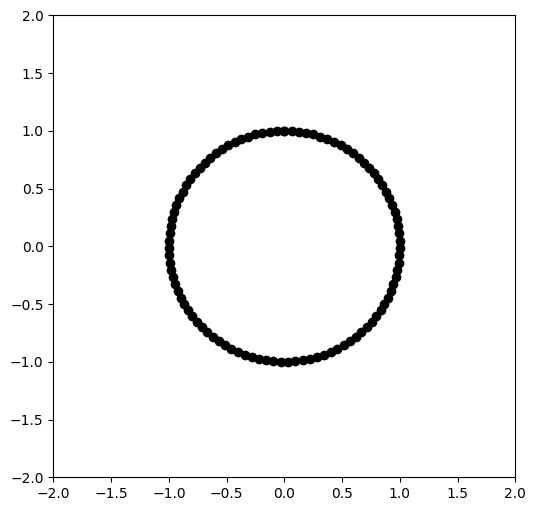

In [99]:
# Ref: https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch07.ipynb
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
# function to update the axis on each iteration
def aframe(ph):

  # create the transformation matrix
  T = np.array([
                 [  1, 1-ph ],
                 [  0, 1    ]
                ])

  # apply the transformation to the points using matrix multiplication
  P = T@points

  # update the dots
  plth.set_xdata(P[0,:])
  plth.set_ydata(P[1,:])

  # export the plot handles
  return plth


# define XY points
theta  = np.linspace(0,2*np.pi,100)
points = np.vstack((np.sin(theta),np.cos(theta)))


# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))
plth,  = ax.plot(np.cos(x),np.sin(x),'ko')
ax.set_aspect('equal')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

# define values for transformation (note: clip off the final point for a smooth animation loop)
phi = np.linspace(-1,1-1/40,40)**2

# run animation!
animation.FuncAnimation(fig, aframe, phi, interval=100, repeat=True)

## Image Feature Detection with Convolution
First we design a 2D gaussian kernel. The equation is:
$$G=exp(-(X^2+Y^2)/\sigma)$$

This is the same as:

$$G=e^{(-(X^2+Y^2)/\sigma)}$$

Where $X$ and $Y$ are 2D grids of (x,y) coordinates on which to evaluate the function, $\sigma$ is a parameter of the function called the "shape" or "width": smaller values make the Gaussian narrower, while larger values make it wider.

In [100]:
def gaussian(size=21, sigma=5):
    xs = np.linspace(-3,3,size)
    X,Y = np.meshgrid(xs,xs)
    kernel = np.exp(-(X**2+Y**2)/sigma)

    # normalize the kernel sum to 1
    # during matmul it preserves the data scale
    kernel = kernel / np.sum(kernel)
    return kernel

Gaussian parameters


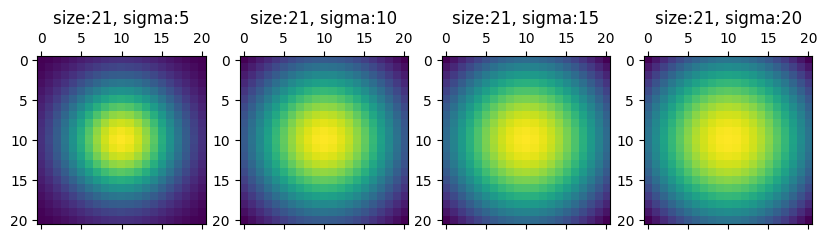

In [101]:
print("Gaussian parameters")
plt.close()
fig, axs = plt.subplots(ncols=4, figsize=[10,5])
axs[0].matshow(gaussian(21,5))
axs[1].matshow(gaussian(21,10))
axs[2].matshow(gaussian(21,15))
axs[3].matshow(gaussian(21,20))
axs[0].set_title("size:21, sigma:5")
axs[1].set_title("size:21, sigma:10")
axs[2].set_title("size:21, sigma:15")
axs[3].set_title("size:21, sigma:20")
plt.show()

Gaussian parameters


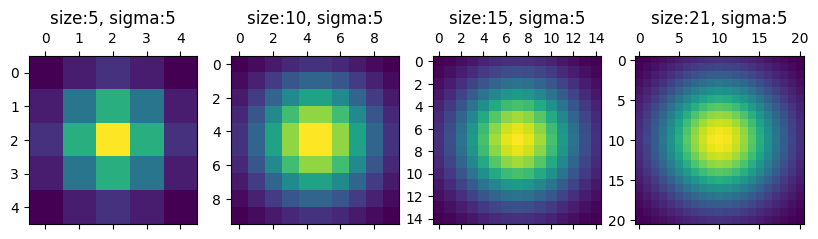

In [102]:
print("Gaussian parameters")
plt.close()
fig, axs = plt.subplots(ncols=4, figsize=[10,5])
axs[0].matshow(gaussian(5,5))
axs[1].matshow(gaussian(10,5))
axs[2].matshow(gaussian(15,5))
axs[3].matshow(gaussian(21,5))
axs[0].set_title("size:5, sigma:5")
axs[1].set_title("size:10, sigma:5")
axs[2].set_title("size:15, sigma:5")
axs[3].set_title("size:21, sigma:5")
plt.show()

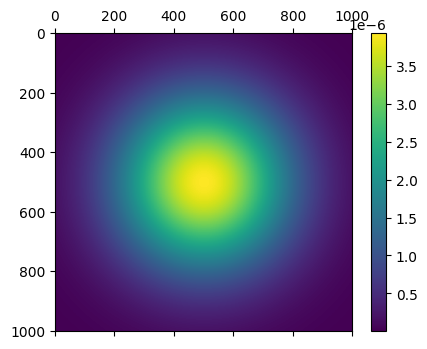

In [103]:
plt.close()
plt.matshow(gaussian(1001,3))
plt.colorbar(shrink=0.8)
plt.show()

image shape: (427, 640, 3)


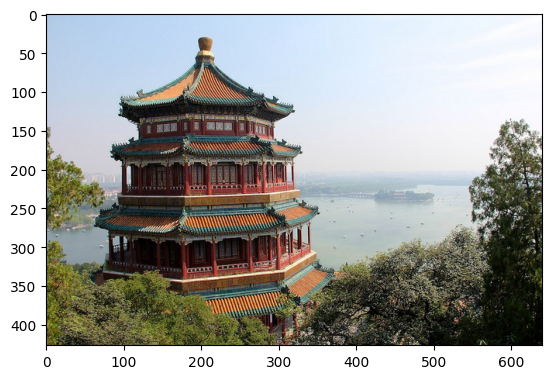

In [130]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
print("image shape:", china.shape)
plt.close()
plt.imshow(china)
plt.show()

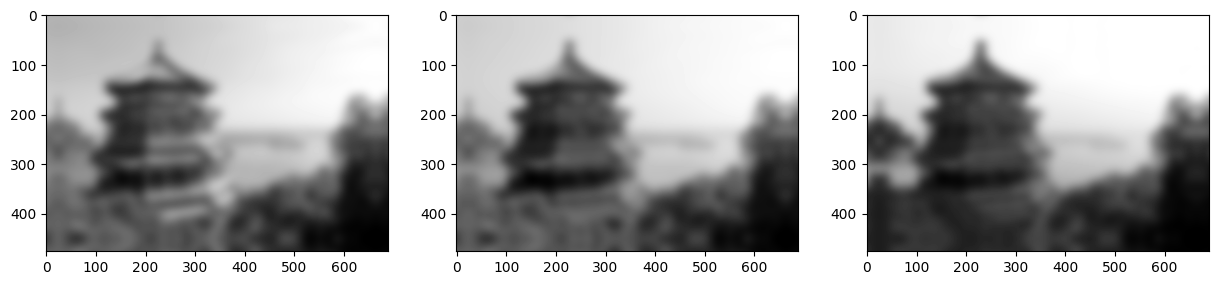

In [163]:
# use a guassian kernel to convolve the image of china
# first, we must remove the color channel to make the array
# two dimensional, then use scipy's convolve implementation
# which is computationally superior to a manual nested loop
# it does so by leveraging convolution theory, and applies
# the convolution in the frequency domain, rather than the 
# time/space domain, because convolution in time/space domain
# equals multiplication in the frequency domain.
# we also process each color channel individually because
# the convolution function is for 2D images. if we required
# a color image we could stitch the processed grey images
# back together after processing.
convolution_channel0 = scipy.signal.convolve2d(china[:,:,0],gaussian(50,3), boundary="symm")
convolution_channel1 = scipy.signal.convolve2d(china[:,:,1],gaussian(50,3), boundary="symm")
convolution_channel2 = scipy.signal.convolve2d(china[:,:,2],gaussian(50,3), boundary="symm")
plt.close()
fig, axs = plt.subplots(ncols=3, figsize=[15,10])
axs[0].imshow(convolution_channel0, cmap="grey")
axs[1].imshow(convolution_channel1, cmap="grey")
axs[2].imshow(convolution_channel2, cmap="grey")
plt.show()

In [164]:
color = np.array([
    convolution_channel0,
    convolution_channel1,
    convolution_channel2
])

In [166]:
# the shape of the original image
china.shape

(427, 640, 3)

In [167]:
# the convolved images, combined
# together in an array
color.shape

(3, 476, 689)

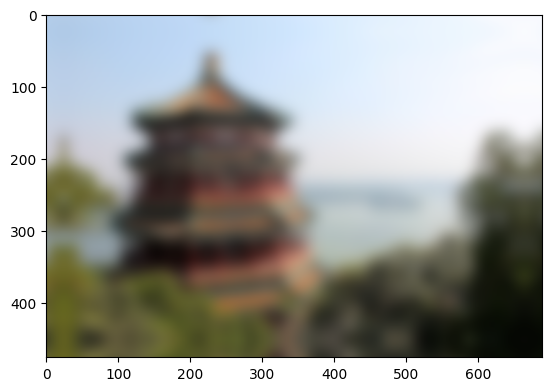

In [196]:
# move the axes around so that
# the color channel is last
np.moveaxis(color,0,-1).shape
plt.close()
plt.imshow(np.moveaxis(color,0,-1).astype("int"))
plt.show()